# HW4 - Q(9.3,10.4,11.3)

# Q9

# 9.3.a

In [1]:
%matplotlib inline
from numpy import ones, zeros, linalg, dot
import matplotlib.pyplot as plt

In [2]:
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.dpi'] = 200
plt.style.use('dark_background')

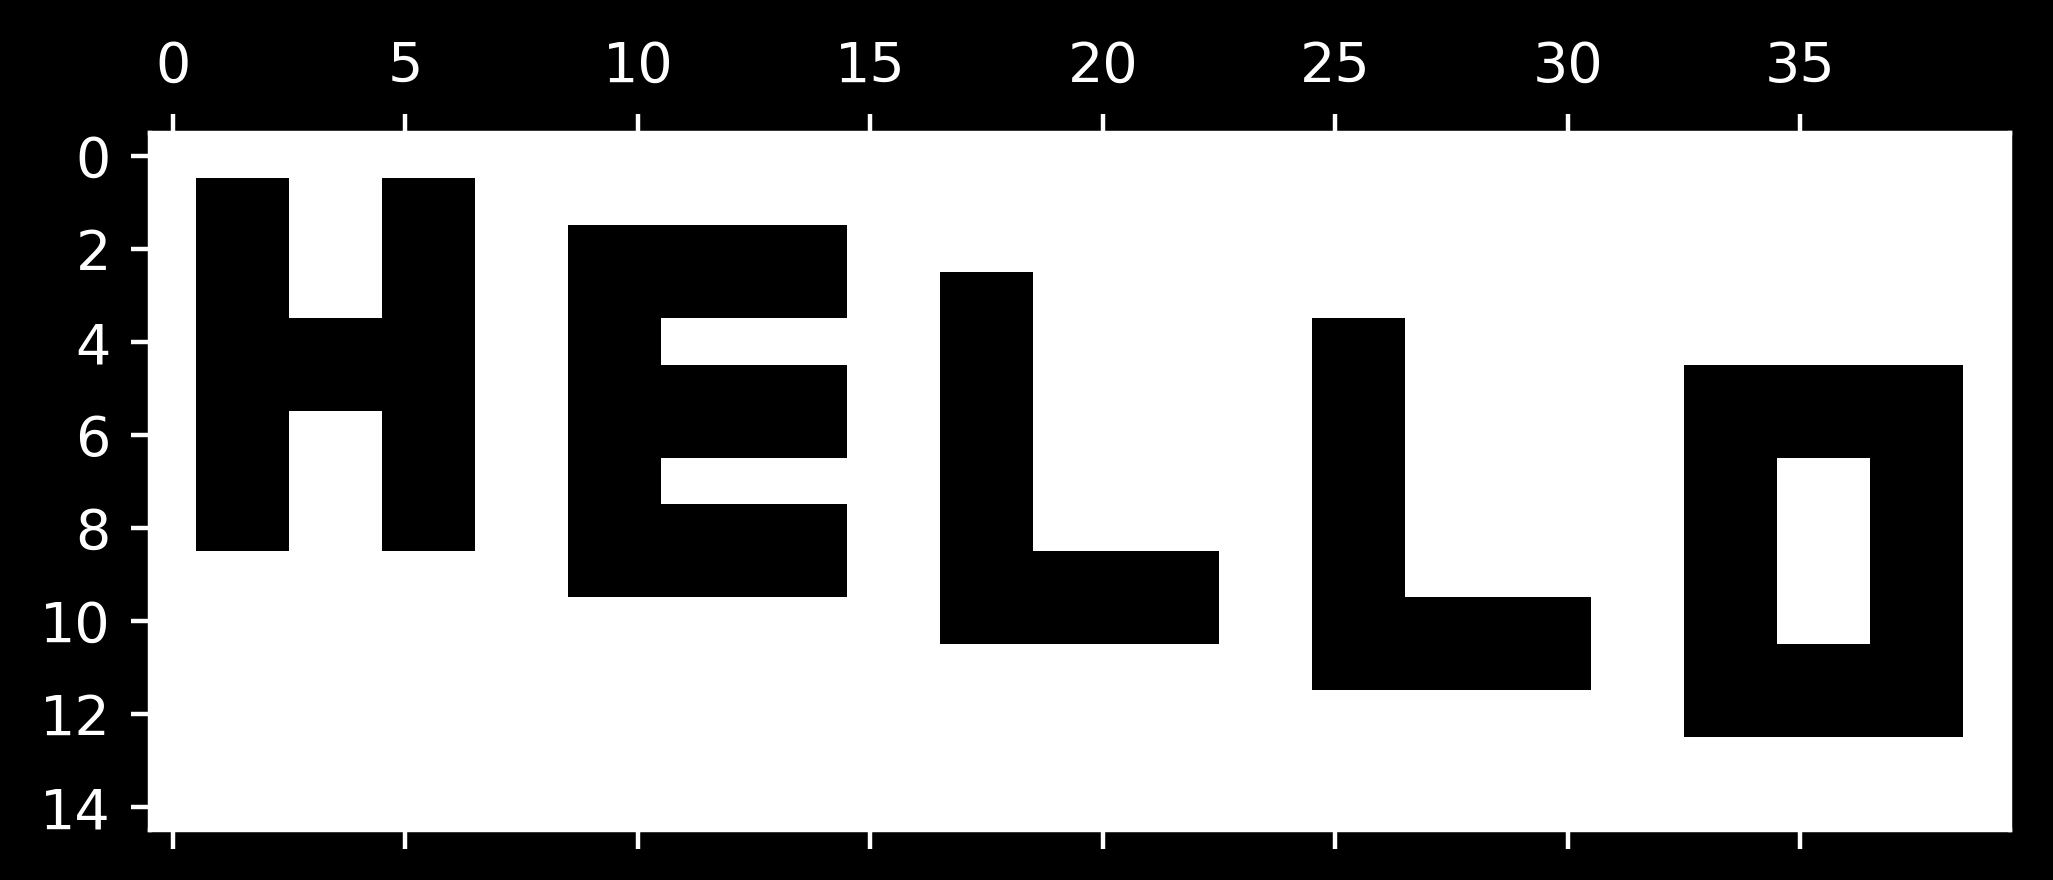

In [3]:
def blocks():
    block = ones((8,6))
    return block

def print_Hello(Out,A,B,C,D,E):
    Out[1:9,1:7]    = A
    Out[2:10,9:15]  = B
    Out[3:11,17:23] = C
    Out[4:12,25:31] = D
    Out[5:13,33:39] = E
    return Out

Z = zeros((15,40))

H = blocks()
H[0:3,2:4] = 0
H[5:8,2:4] = 0

E = blocks()
E[2:3,2:6] = 0
E[5:6,2:6] = 0

L = blocks()
L[0:6,2:6] = 0

O = blocks()
O[2:6,2:4] = 0

Hello = print_Hello(Z,H,E,L,L,O)
plt.spy(Hello)
plt.show()

# 9.3.b

Rank of matrix is =
10
10.383269127156247
5.131778864507255
3.1877560332229606
2.9382639457559407
2.0625151686170278
1.837600057492228
1.2269857514703817
0.987917872558919
0.7379853694038372
0.6328849988776559
5.779760000219907e-16
2.5816764414555304e-16
0.0
0.0
0.0


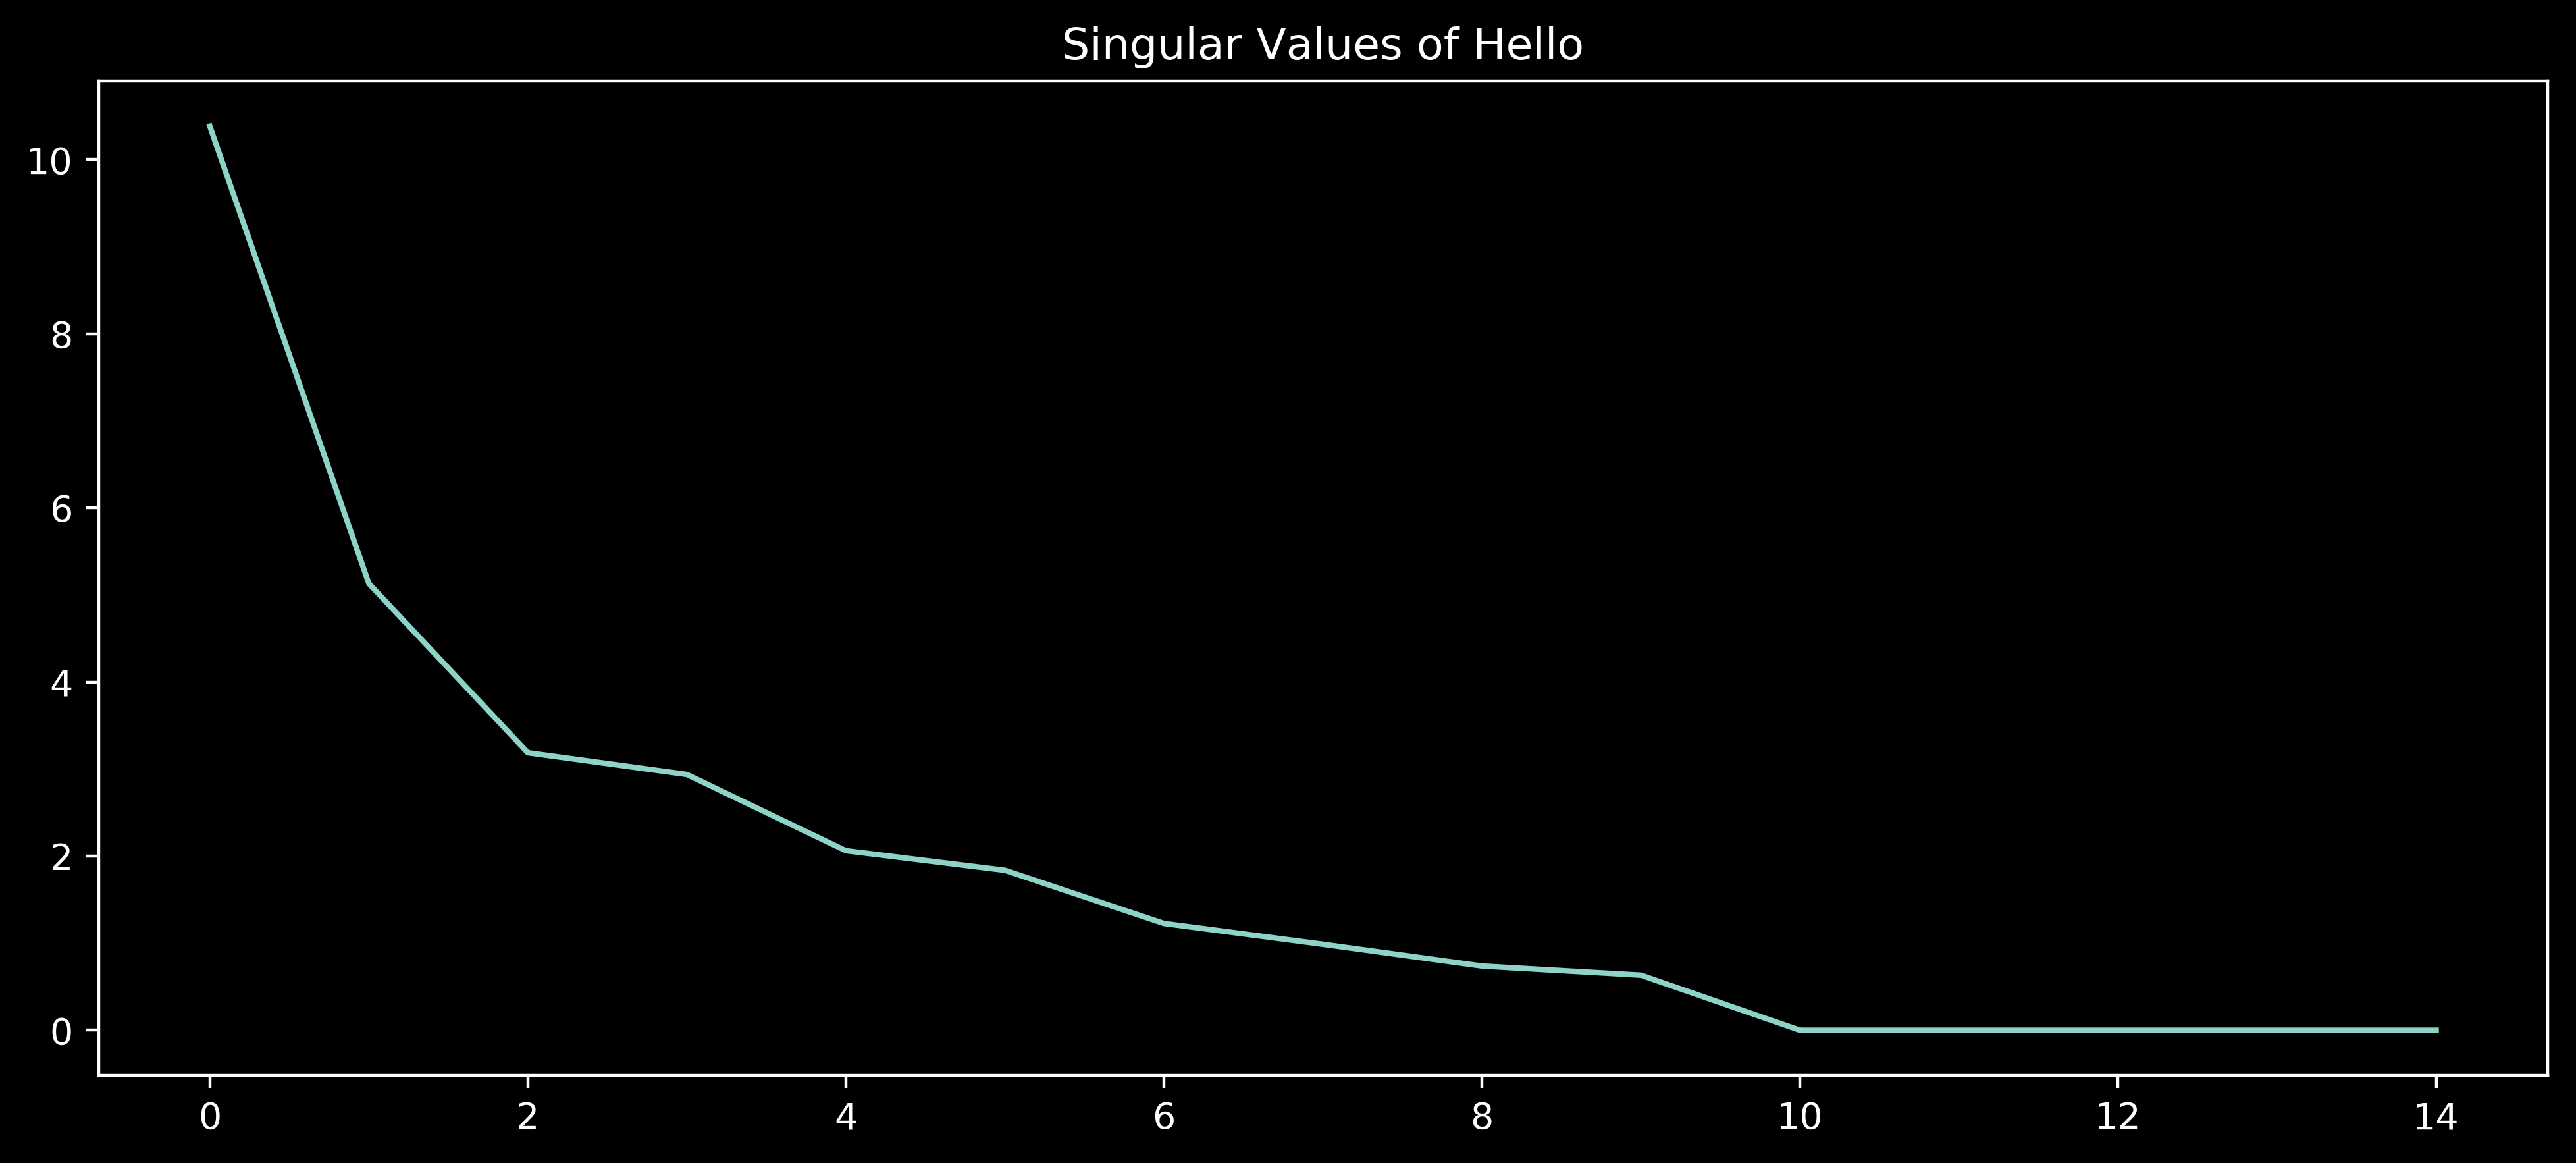

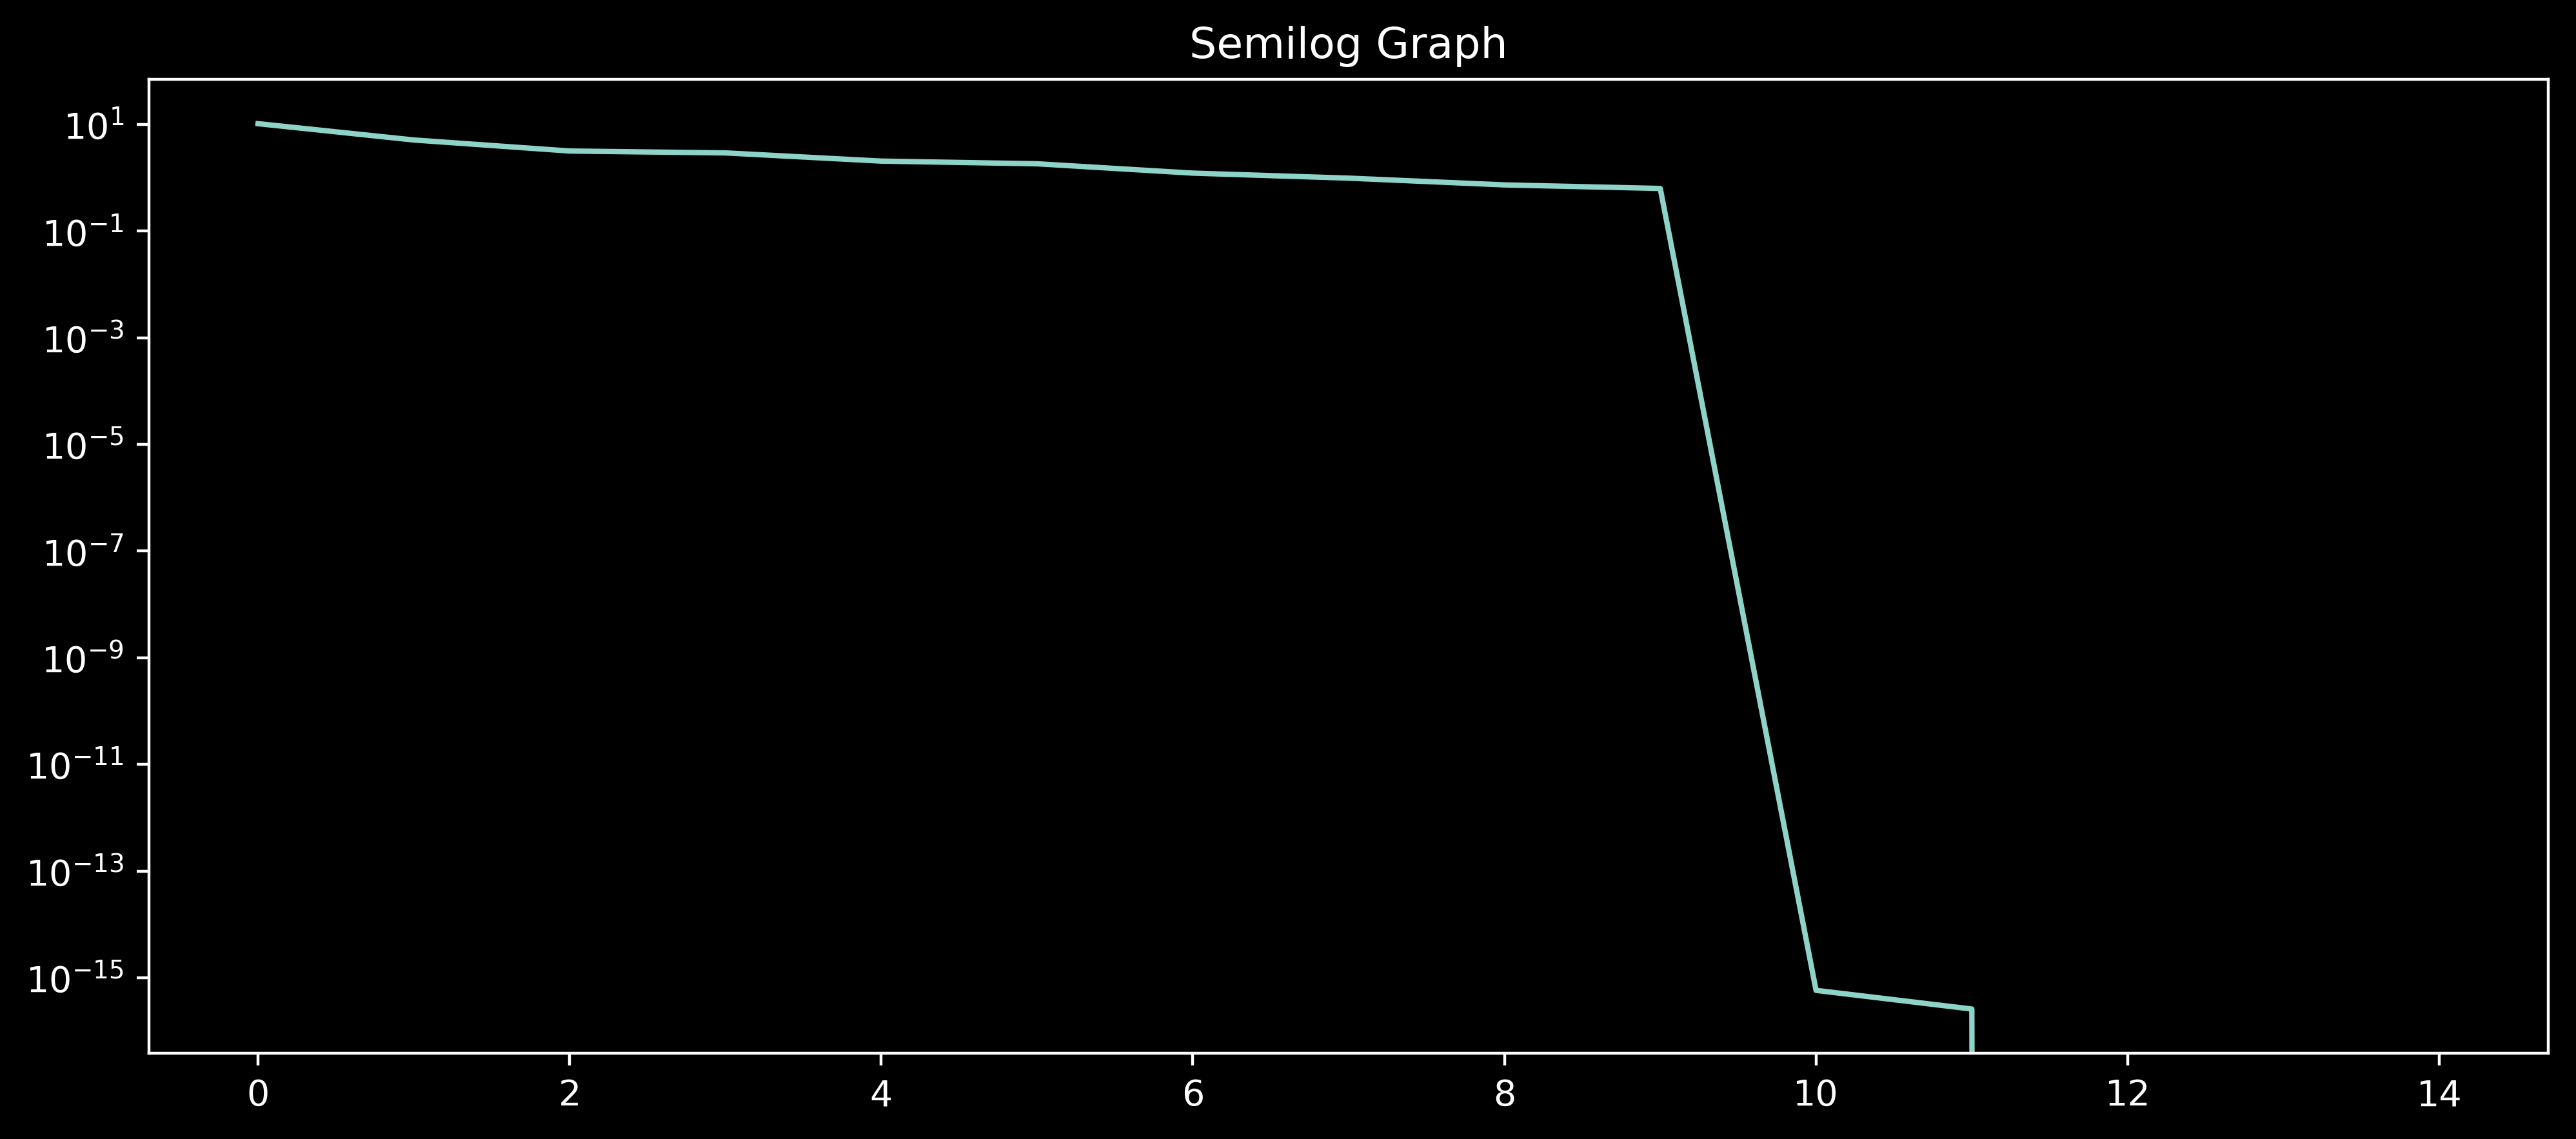

In [4]:
print ("Rank of matrix is =")
print (linalg.matrix_rank(Hello))
S,v,D = linalg.svd(Hello)
for i in range(15):
    print (v[i])

plt.figure(figsize=(12,5))
plt.plot(v)
plt.title('Singular Values of Hello')
plt.show()

plt.figure(figsize=(12,5))
plt.semilogy(v)
plt.title('Semilog Graph')
plt.show()

# 9.3.c

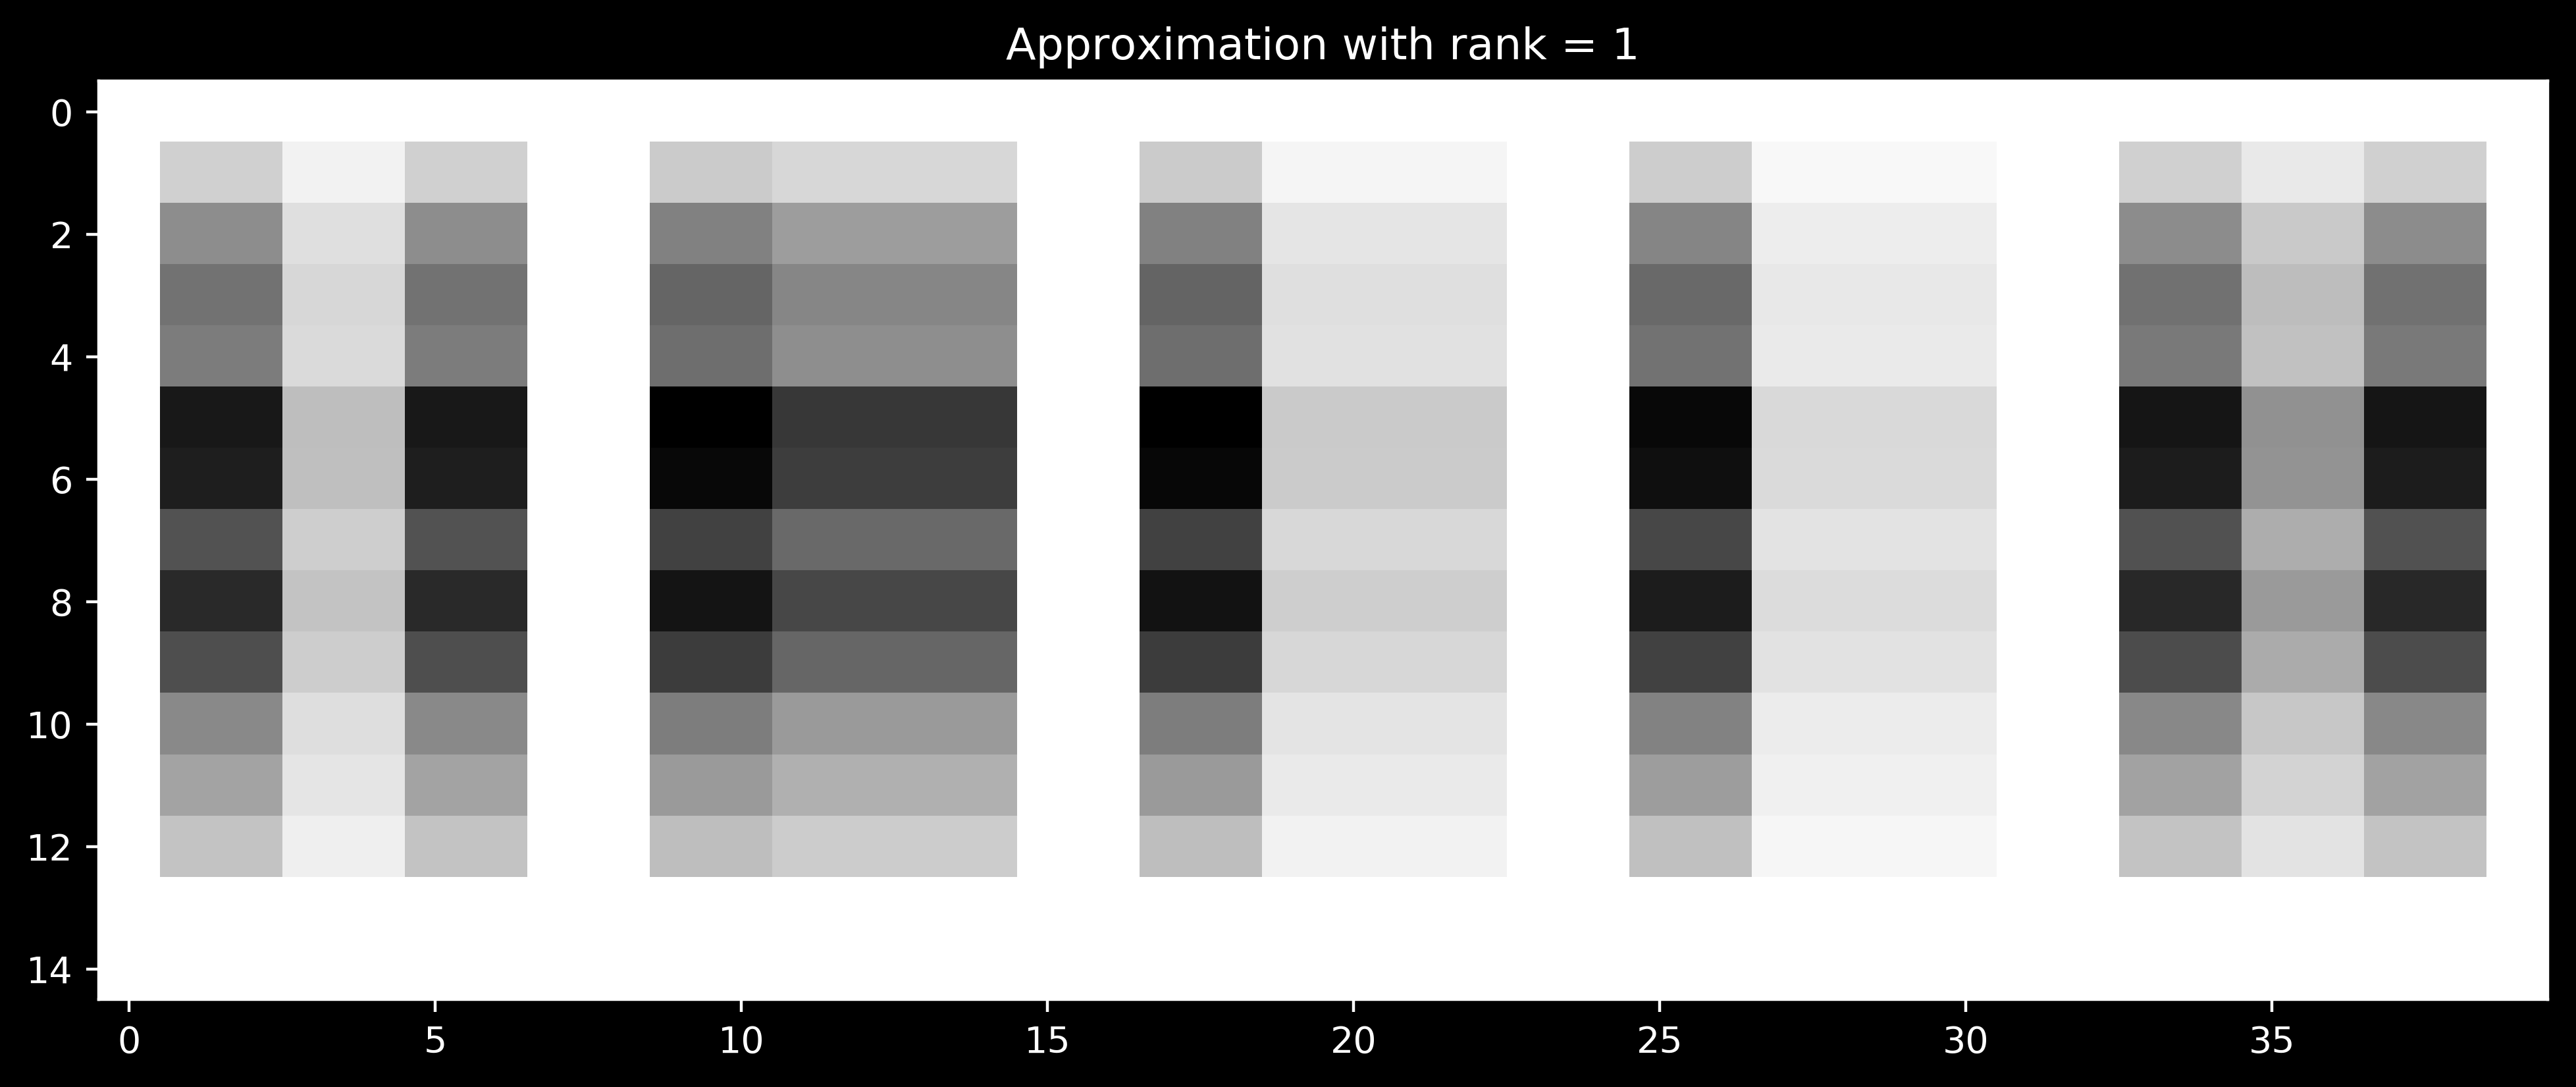

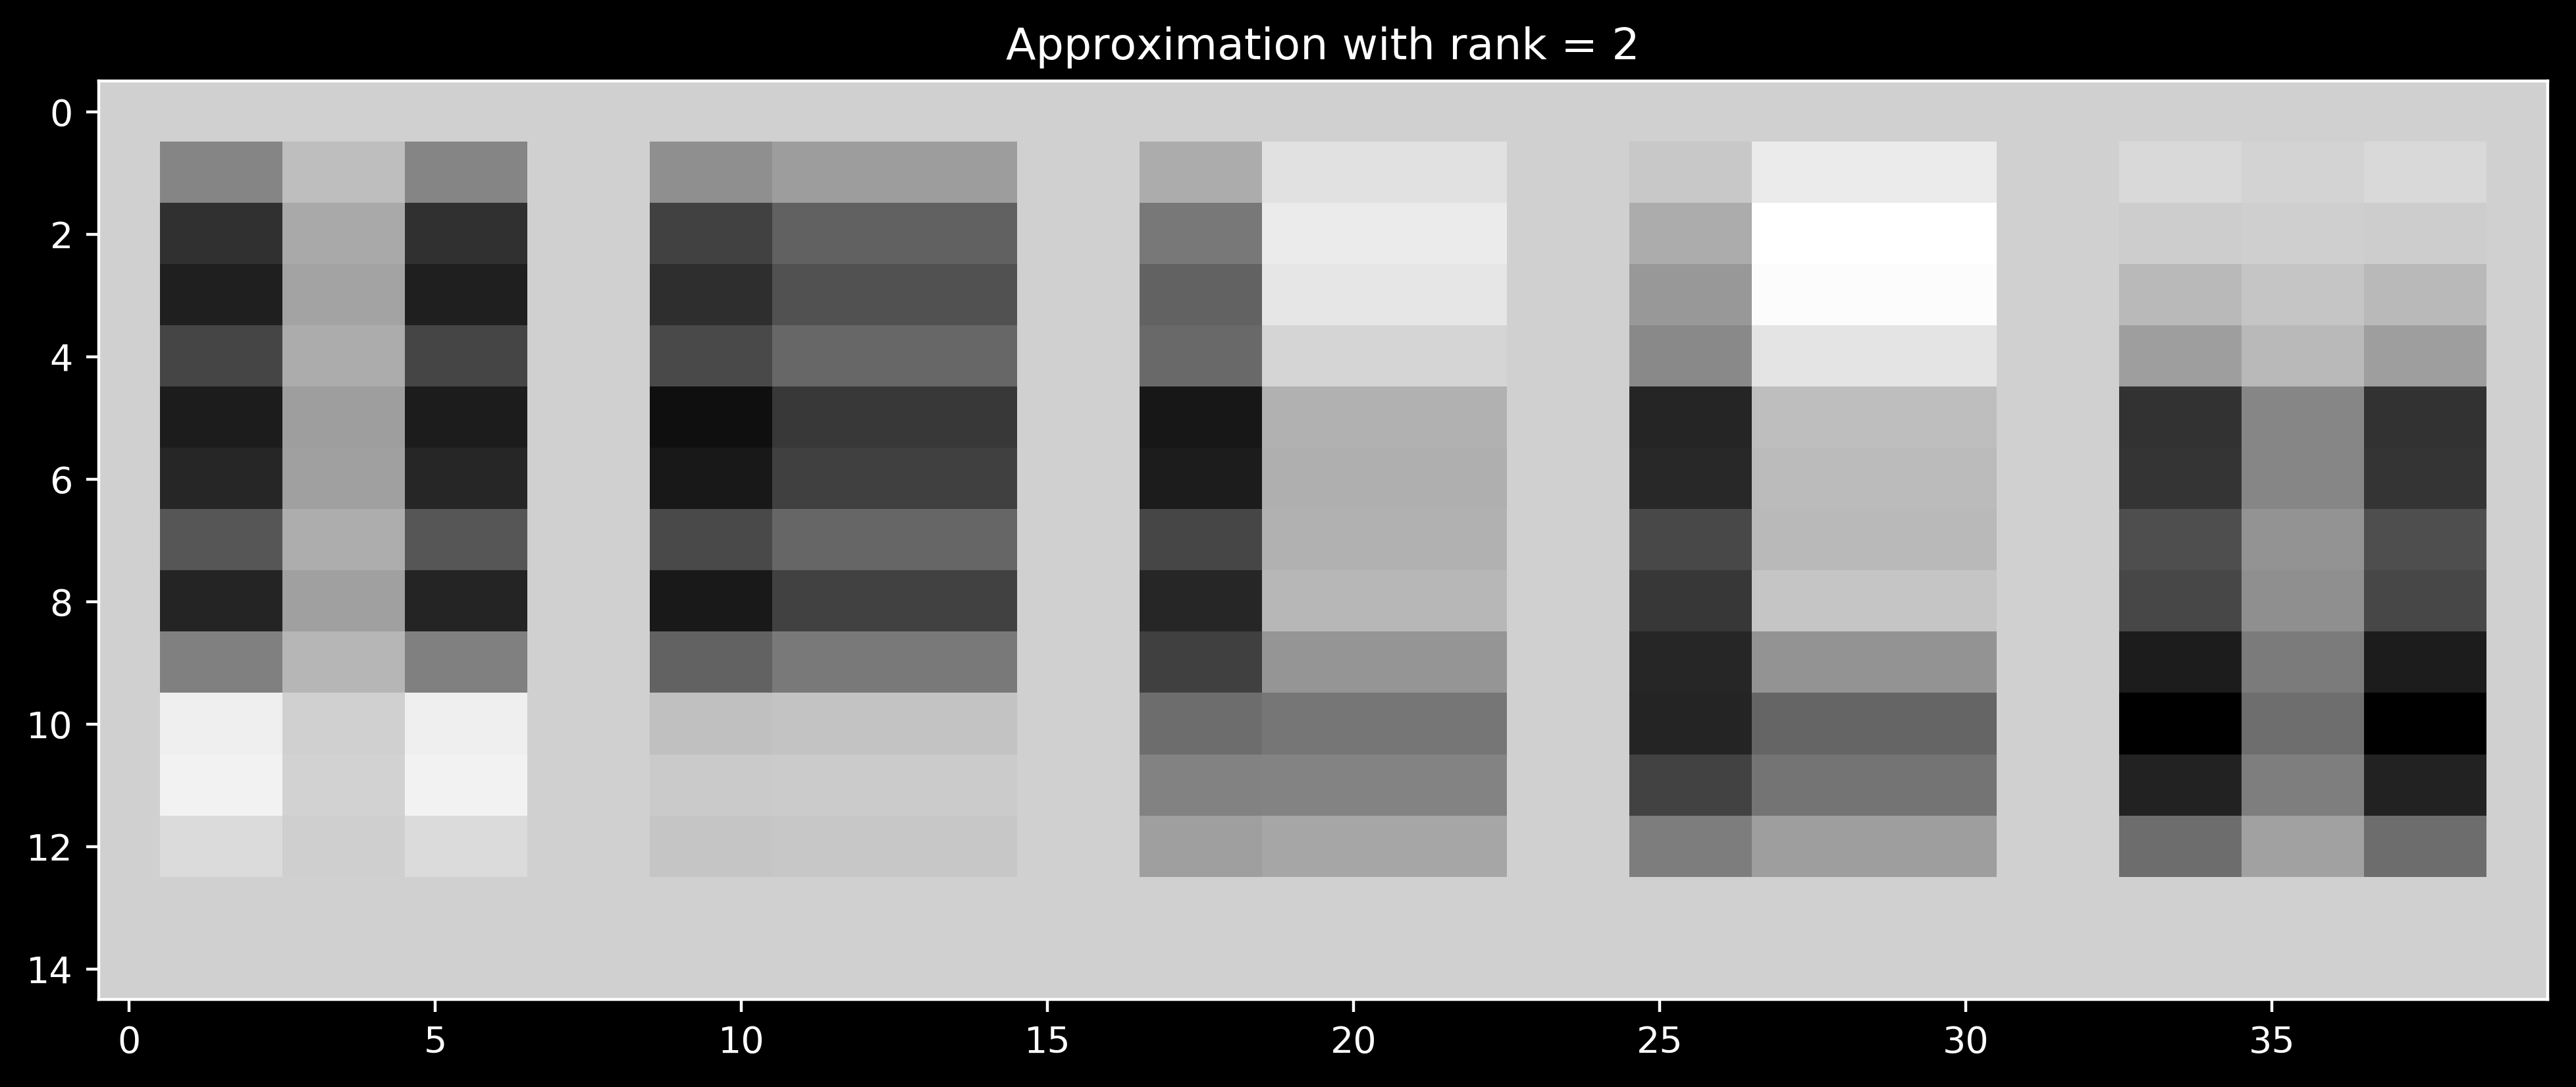

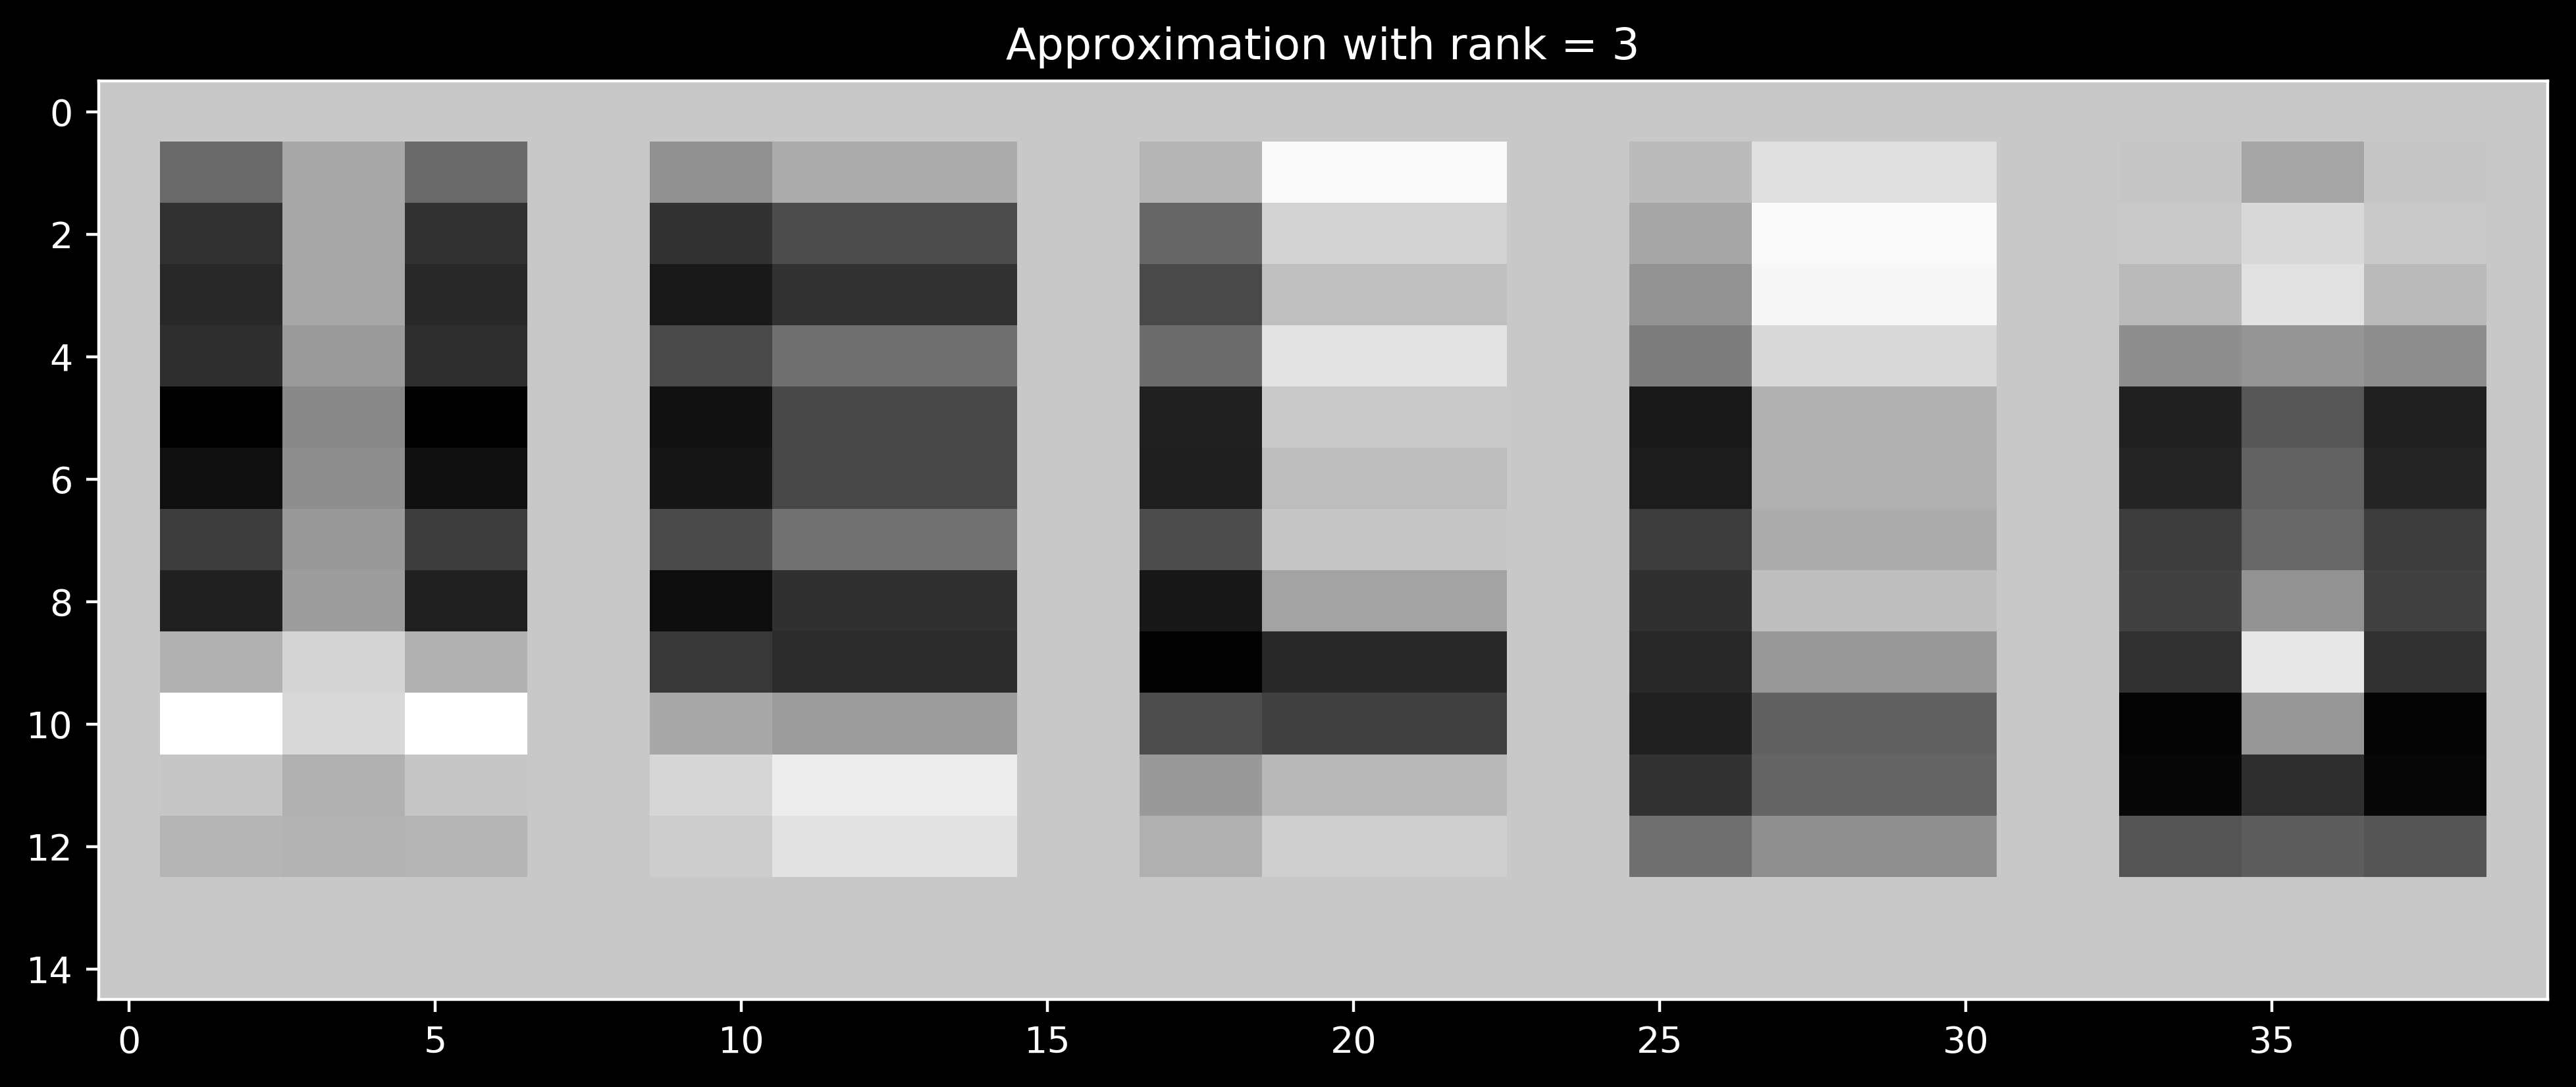

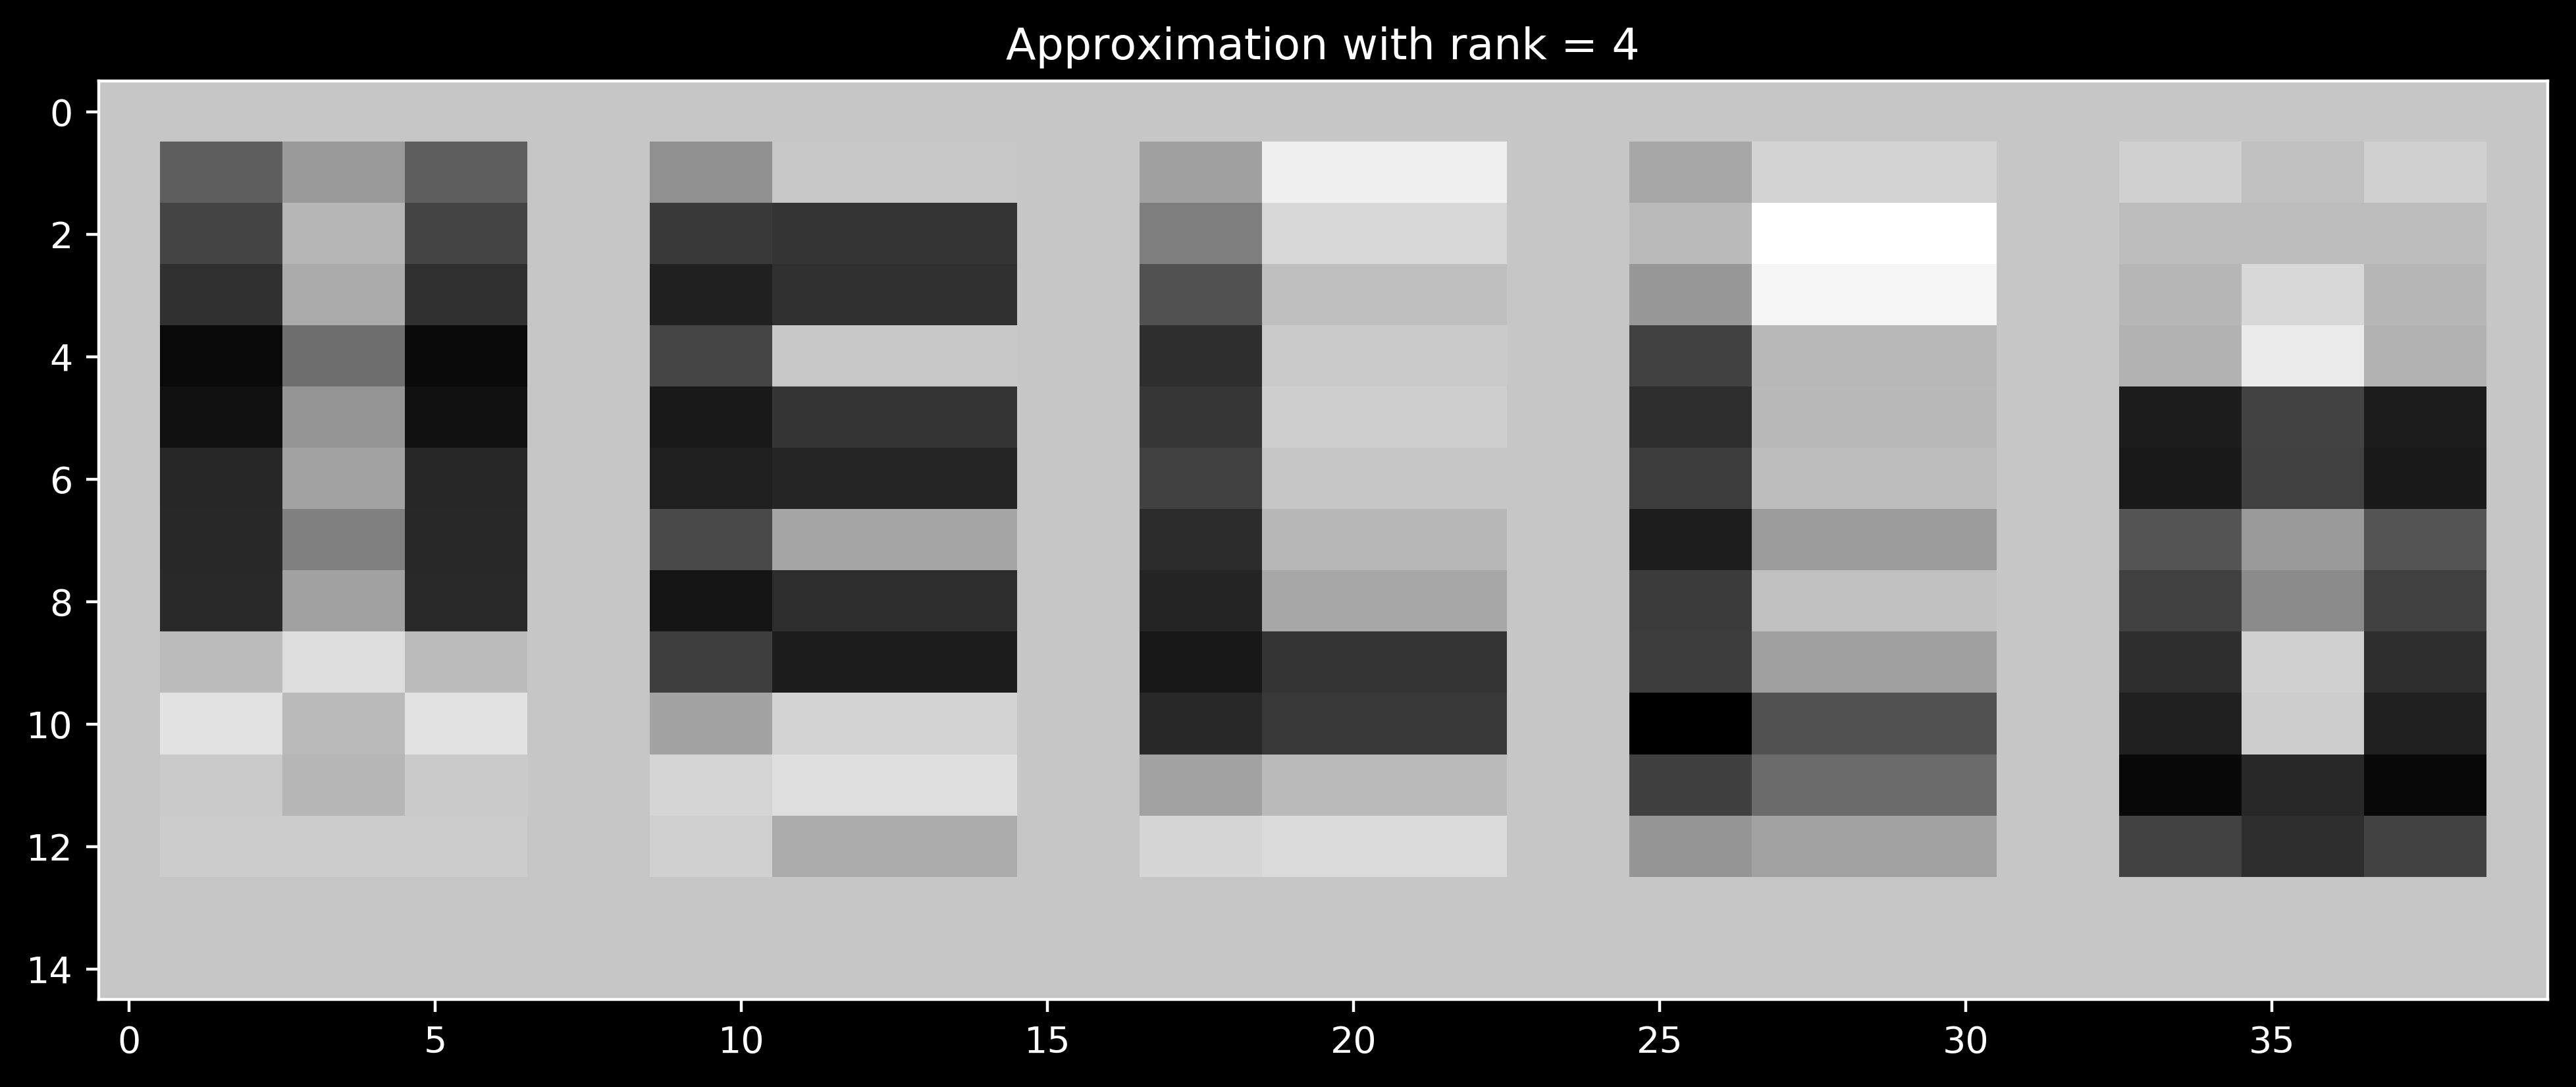

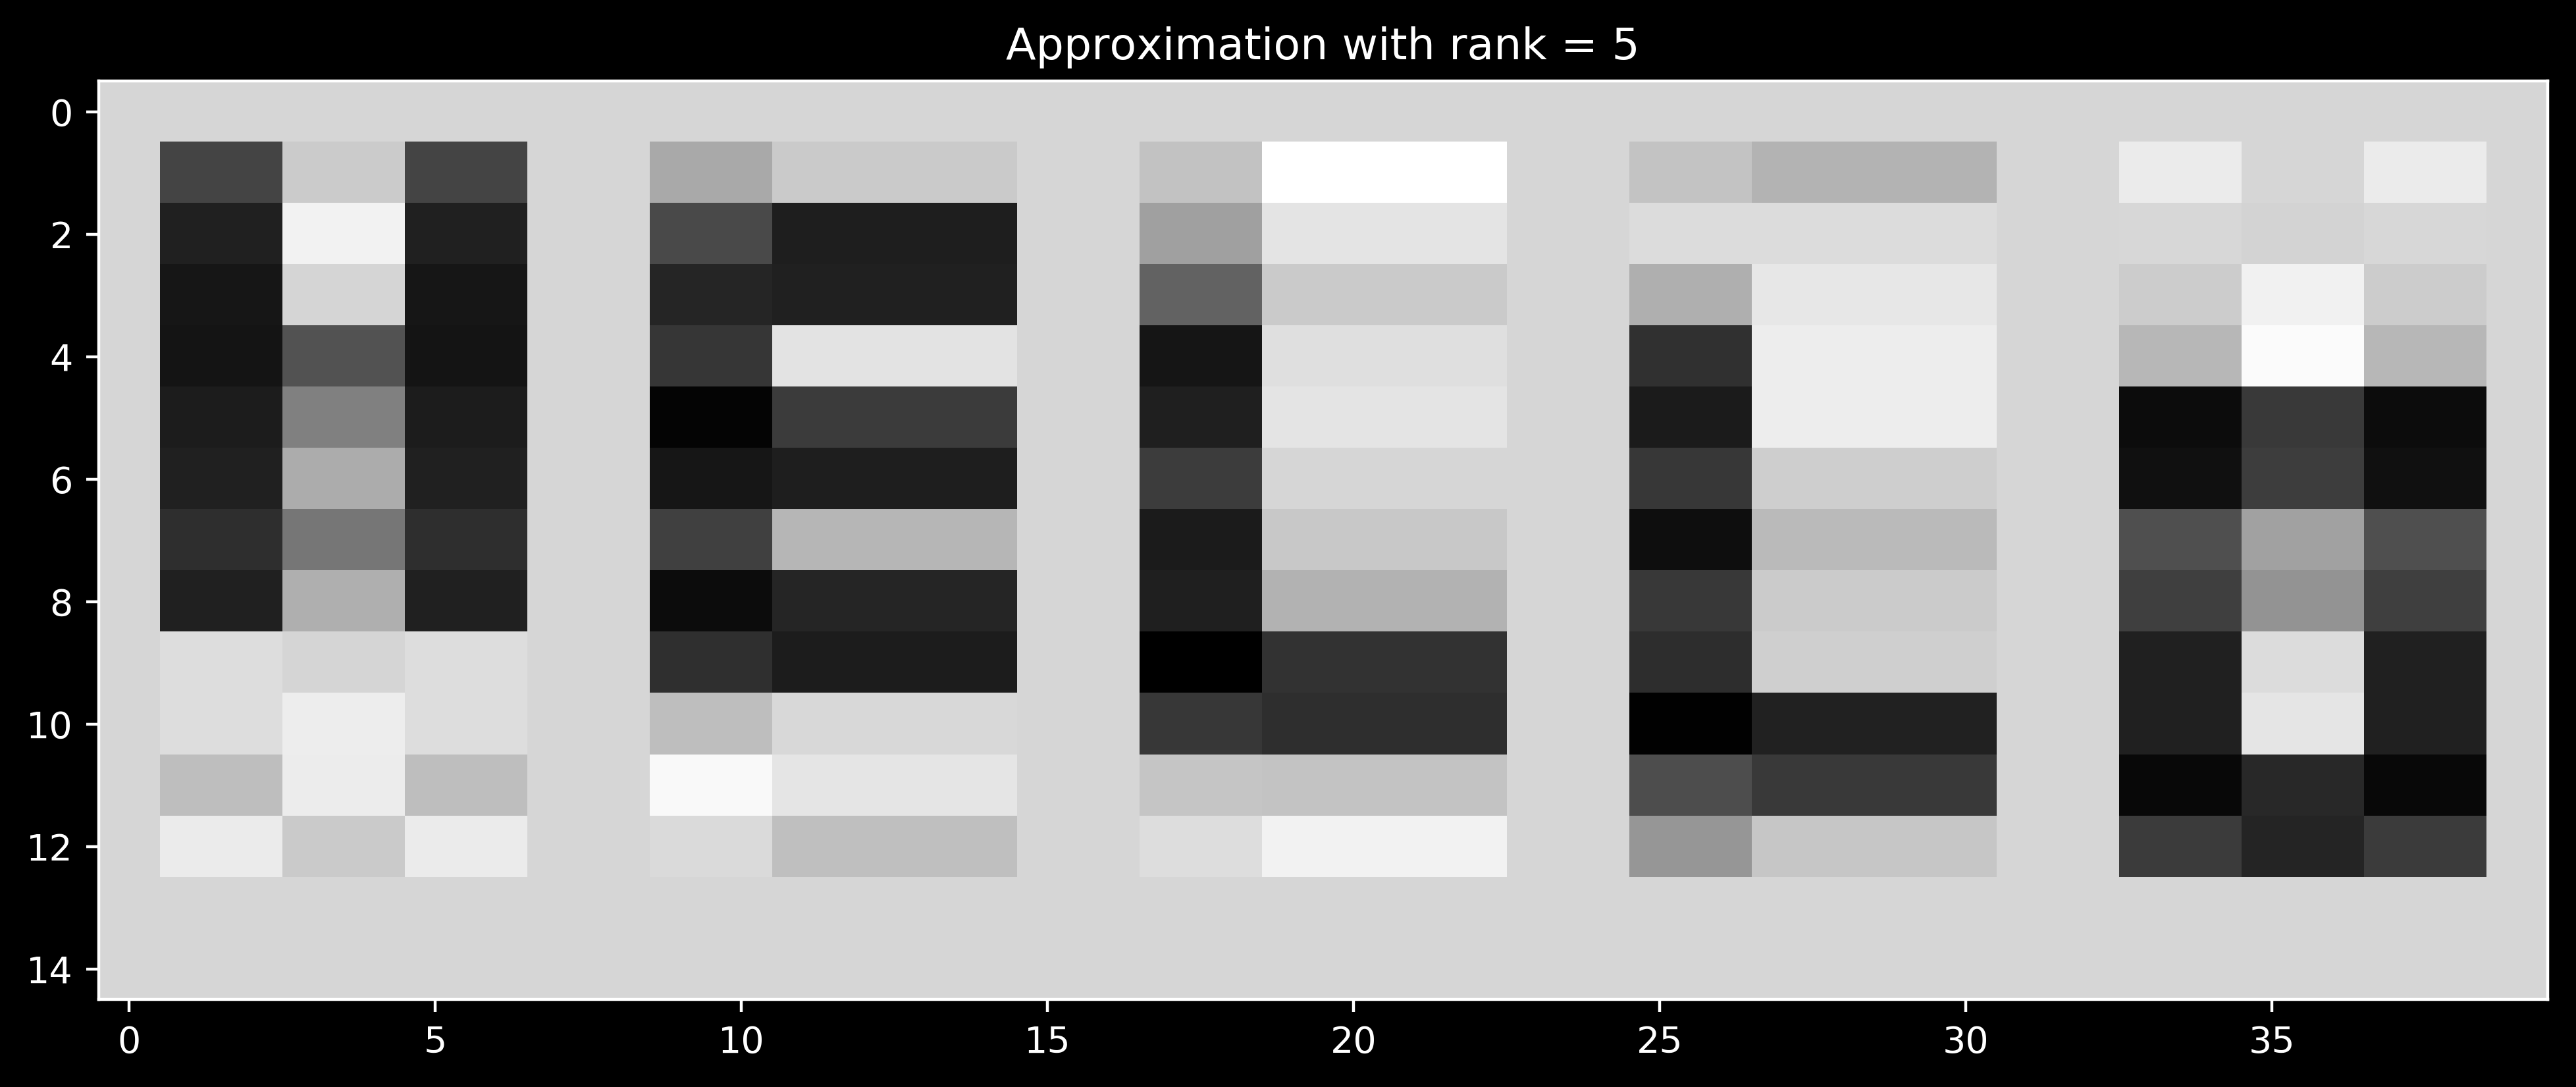

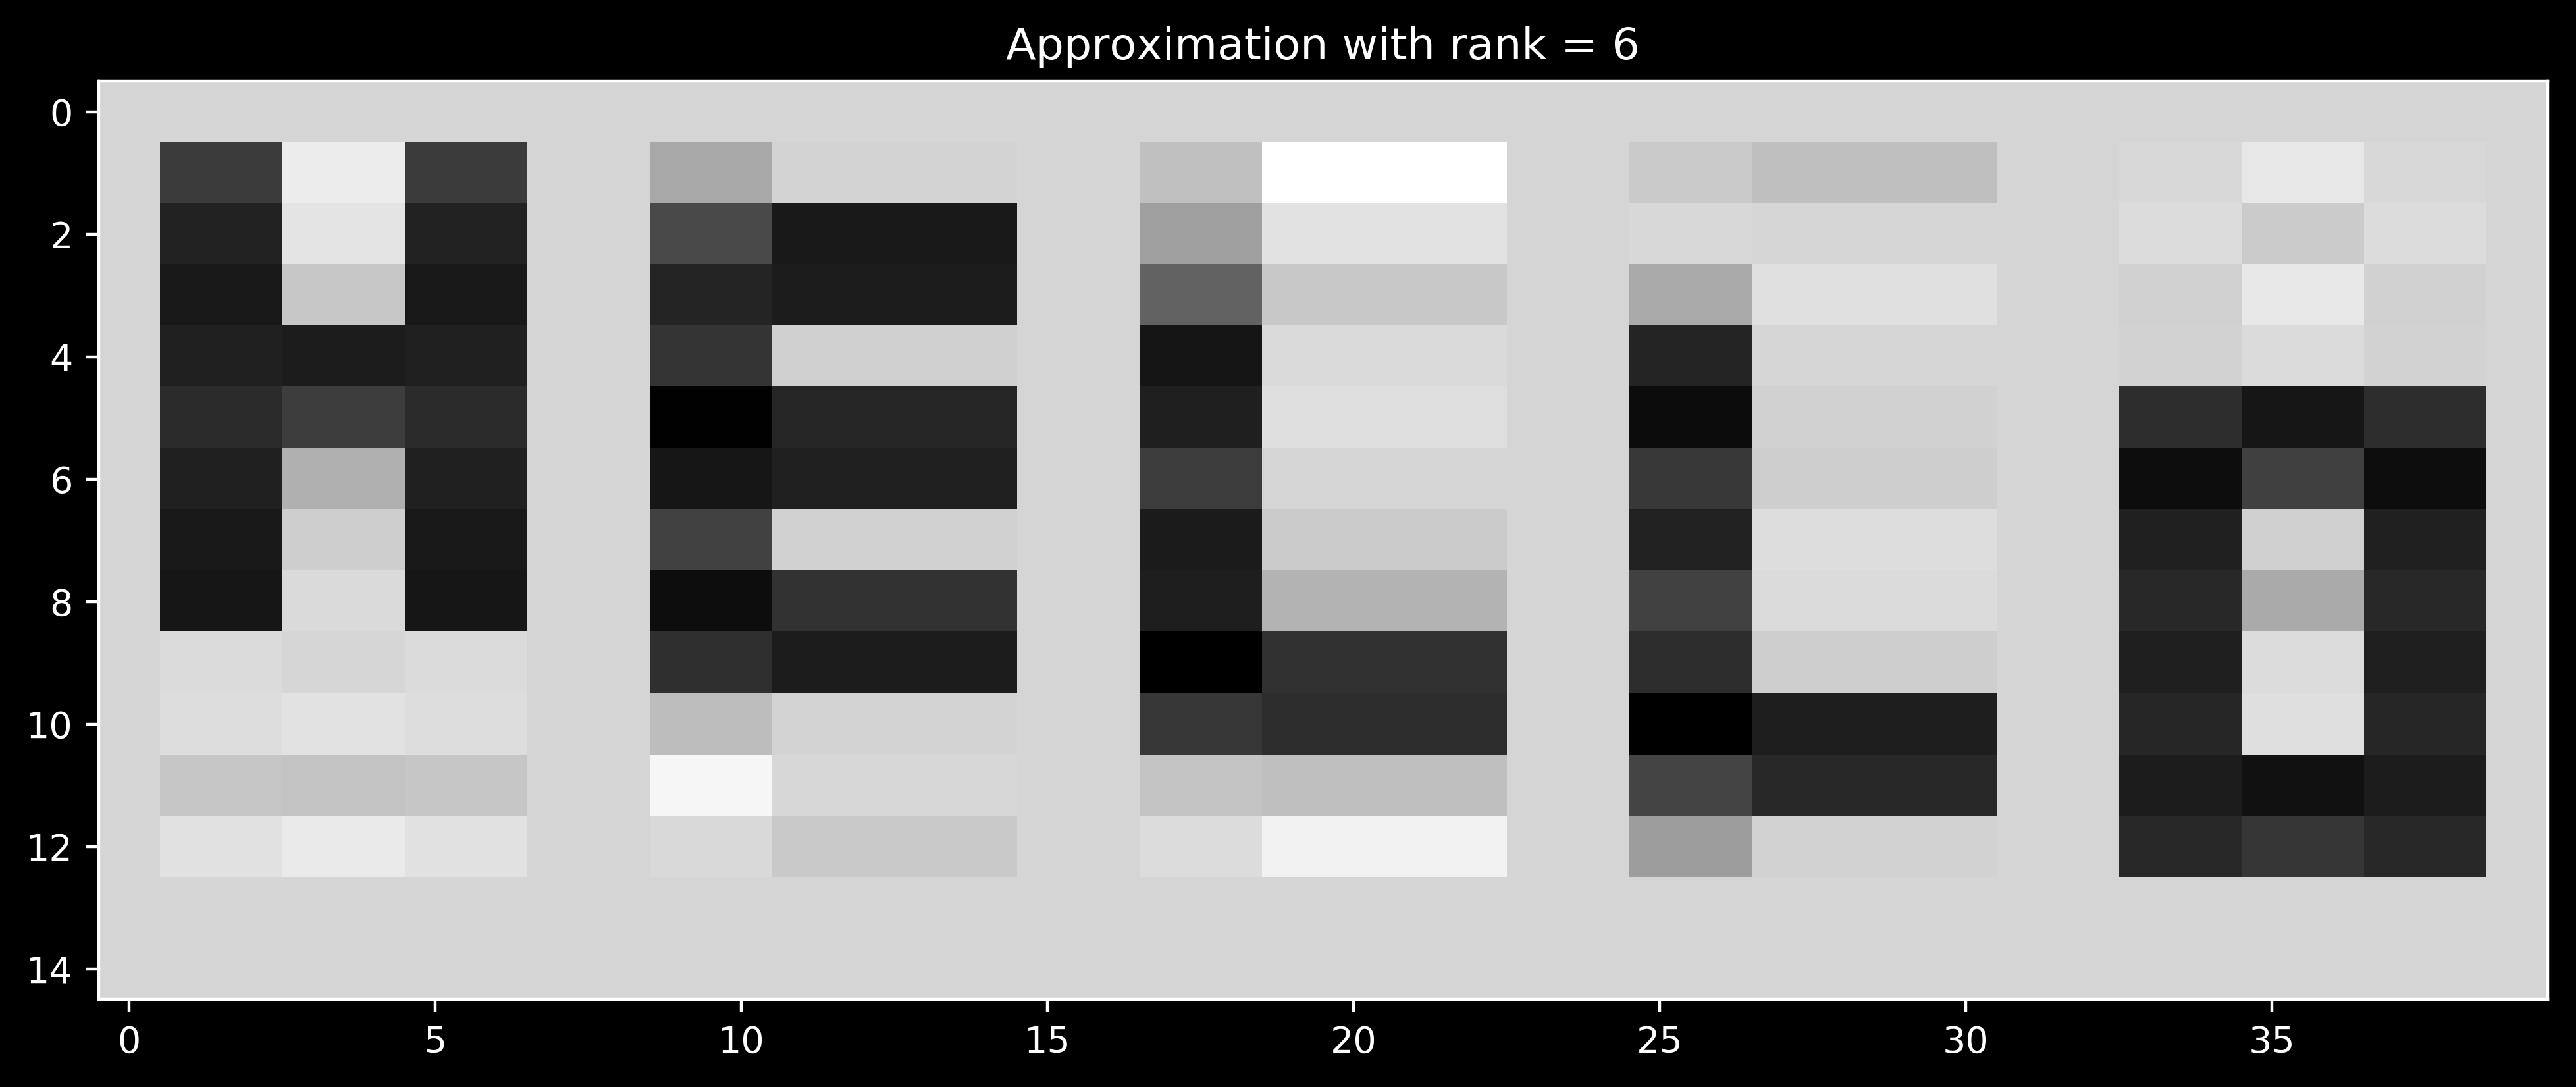

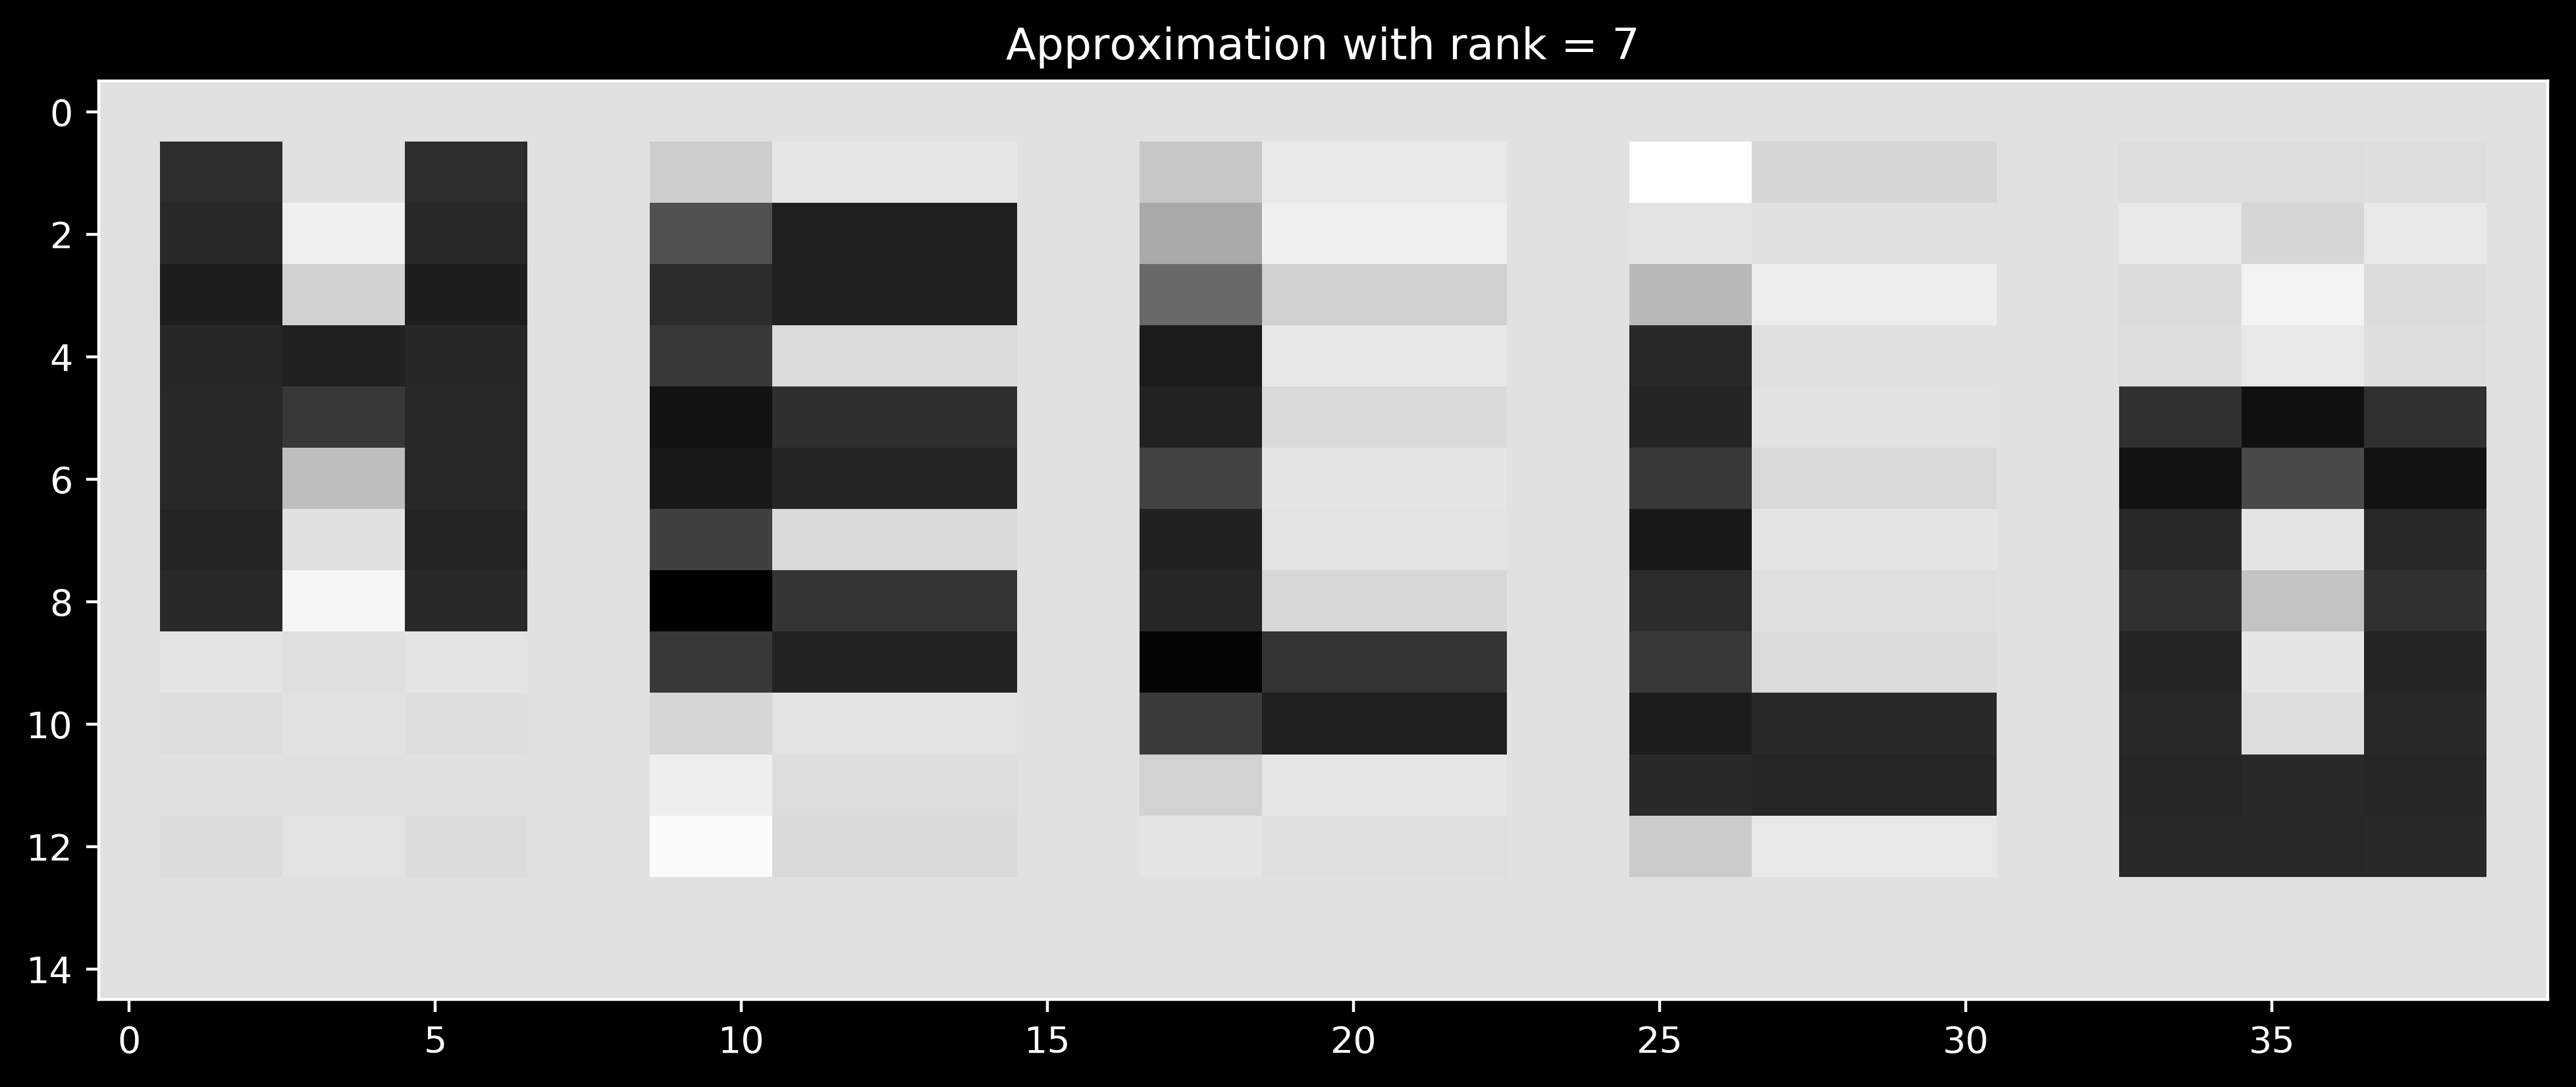

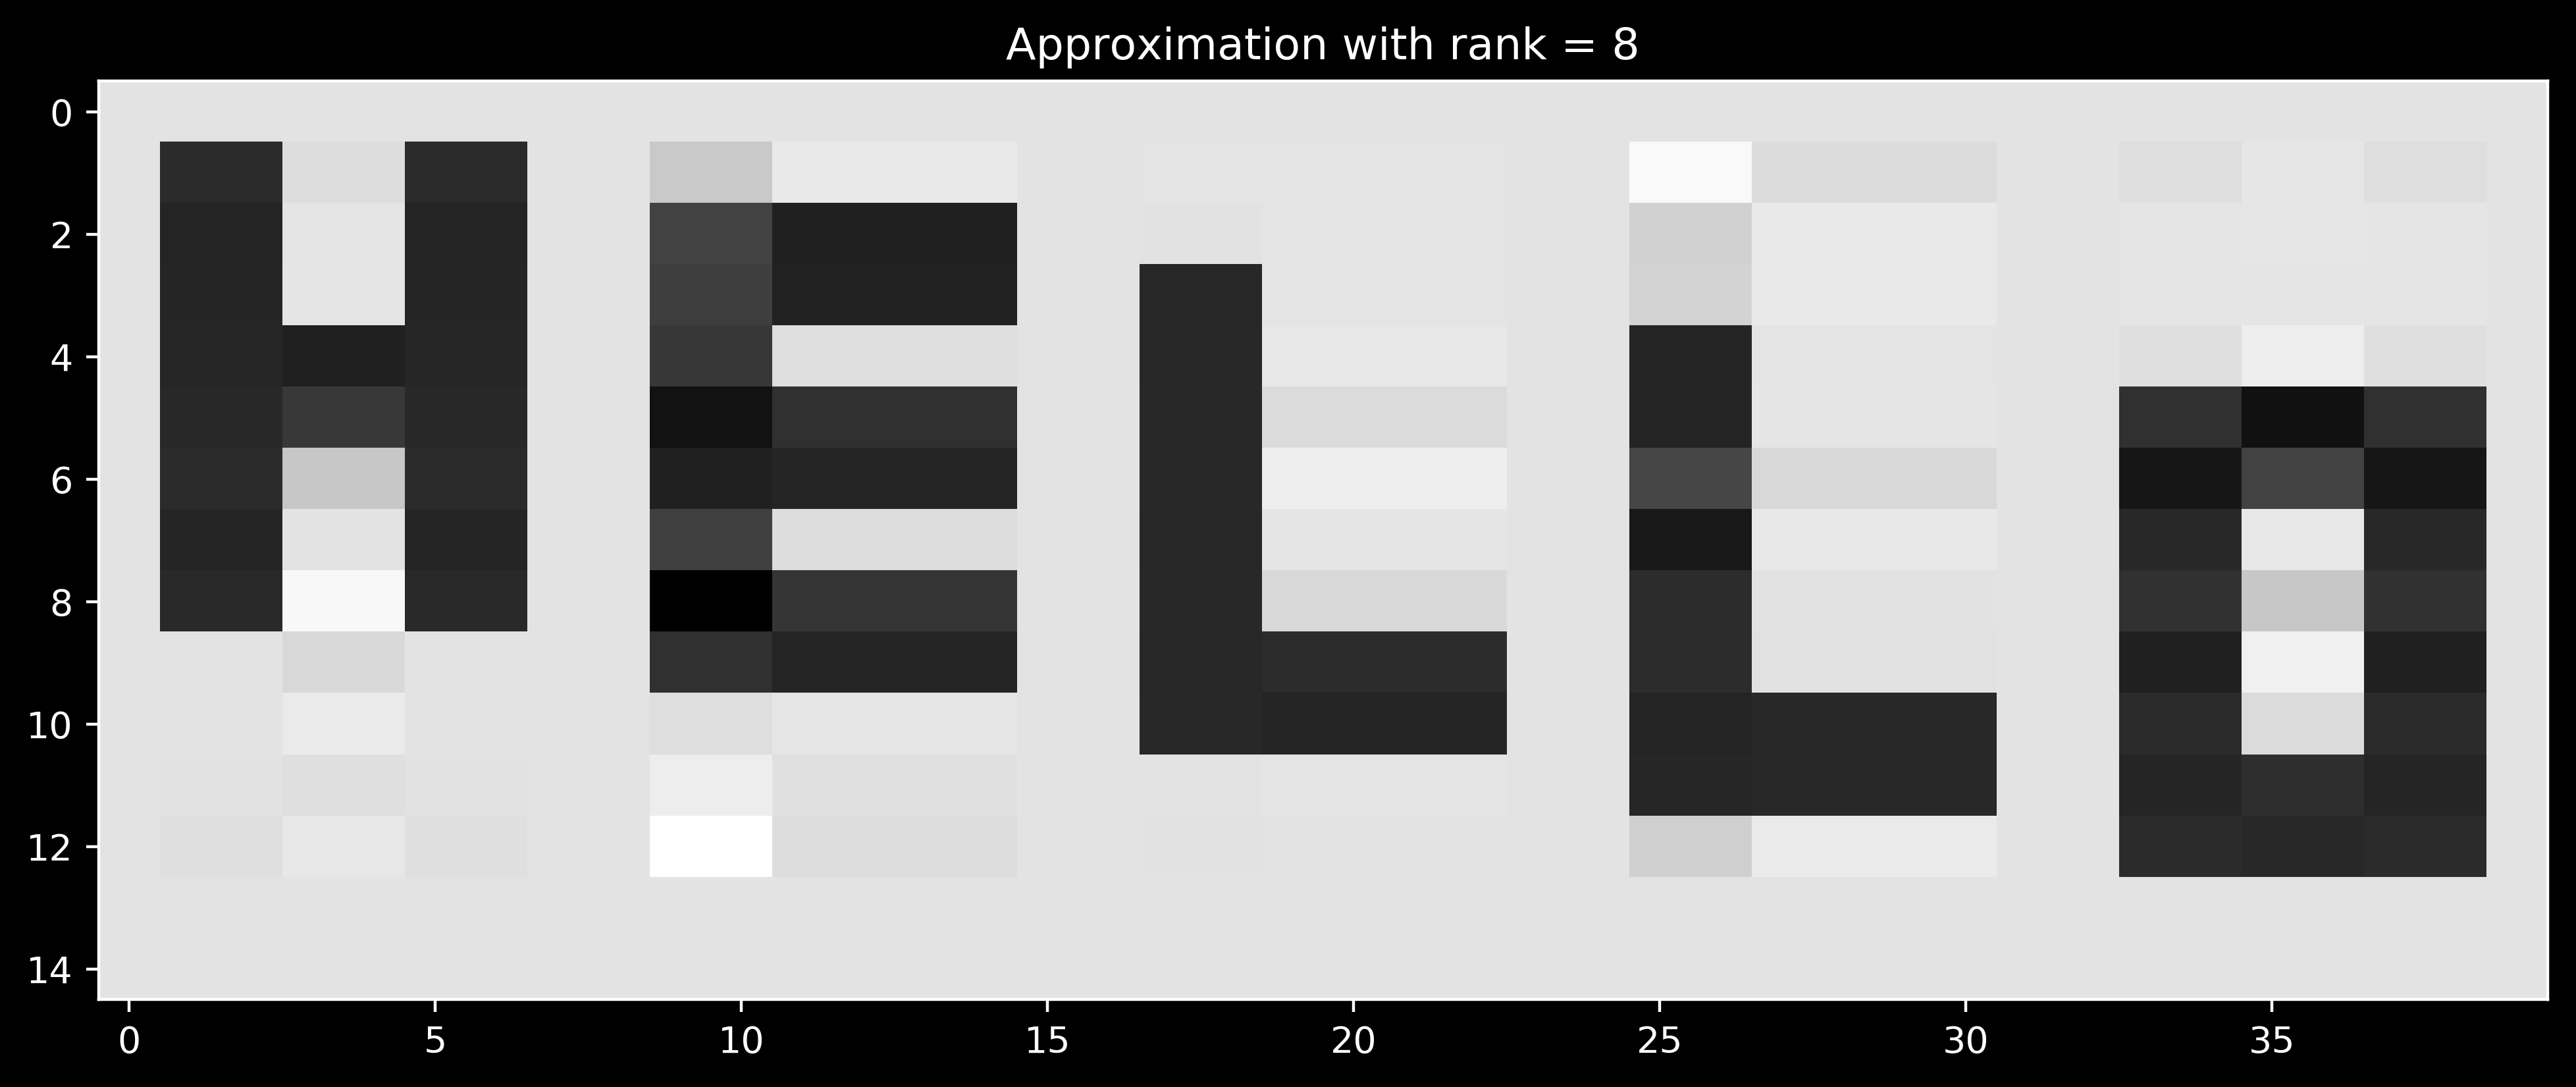

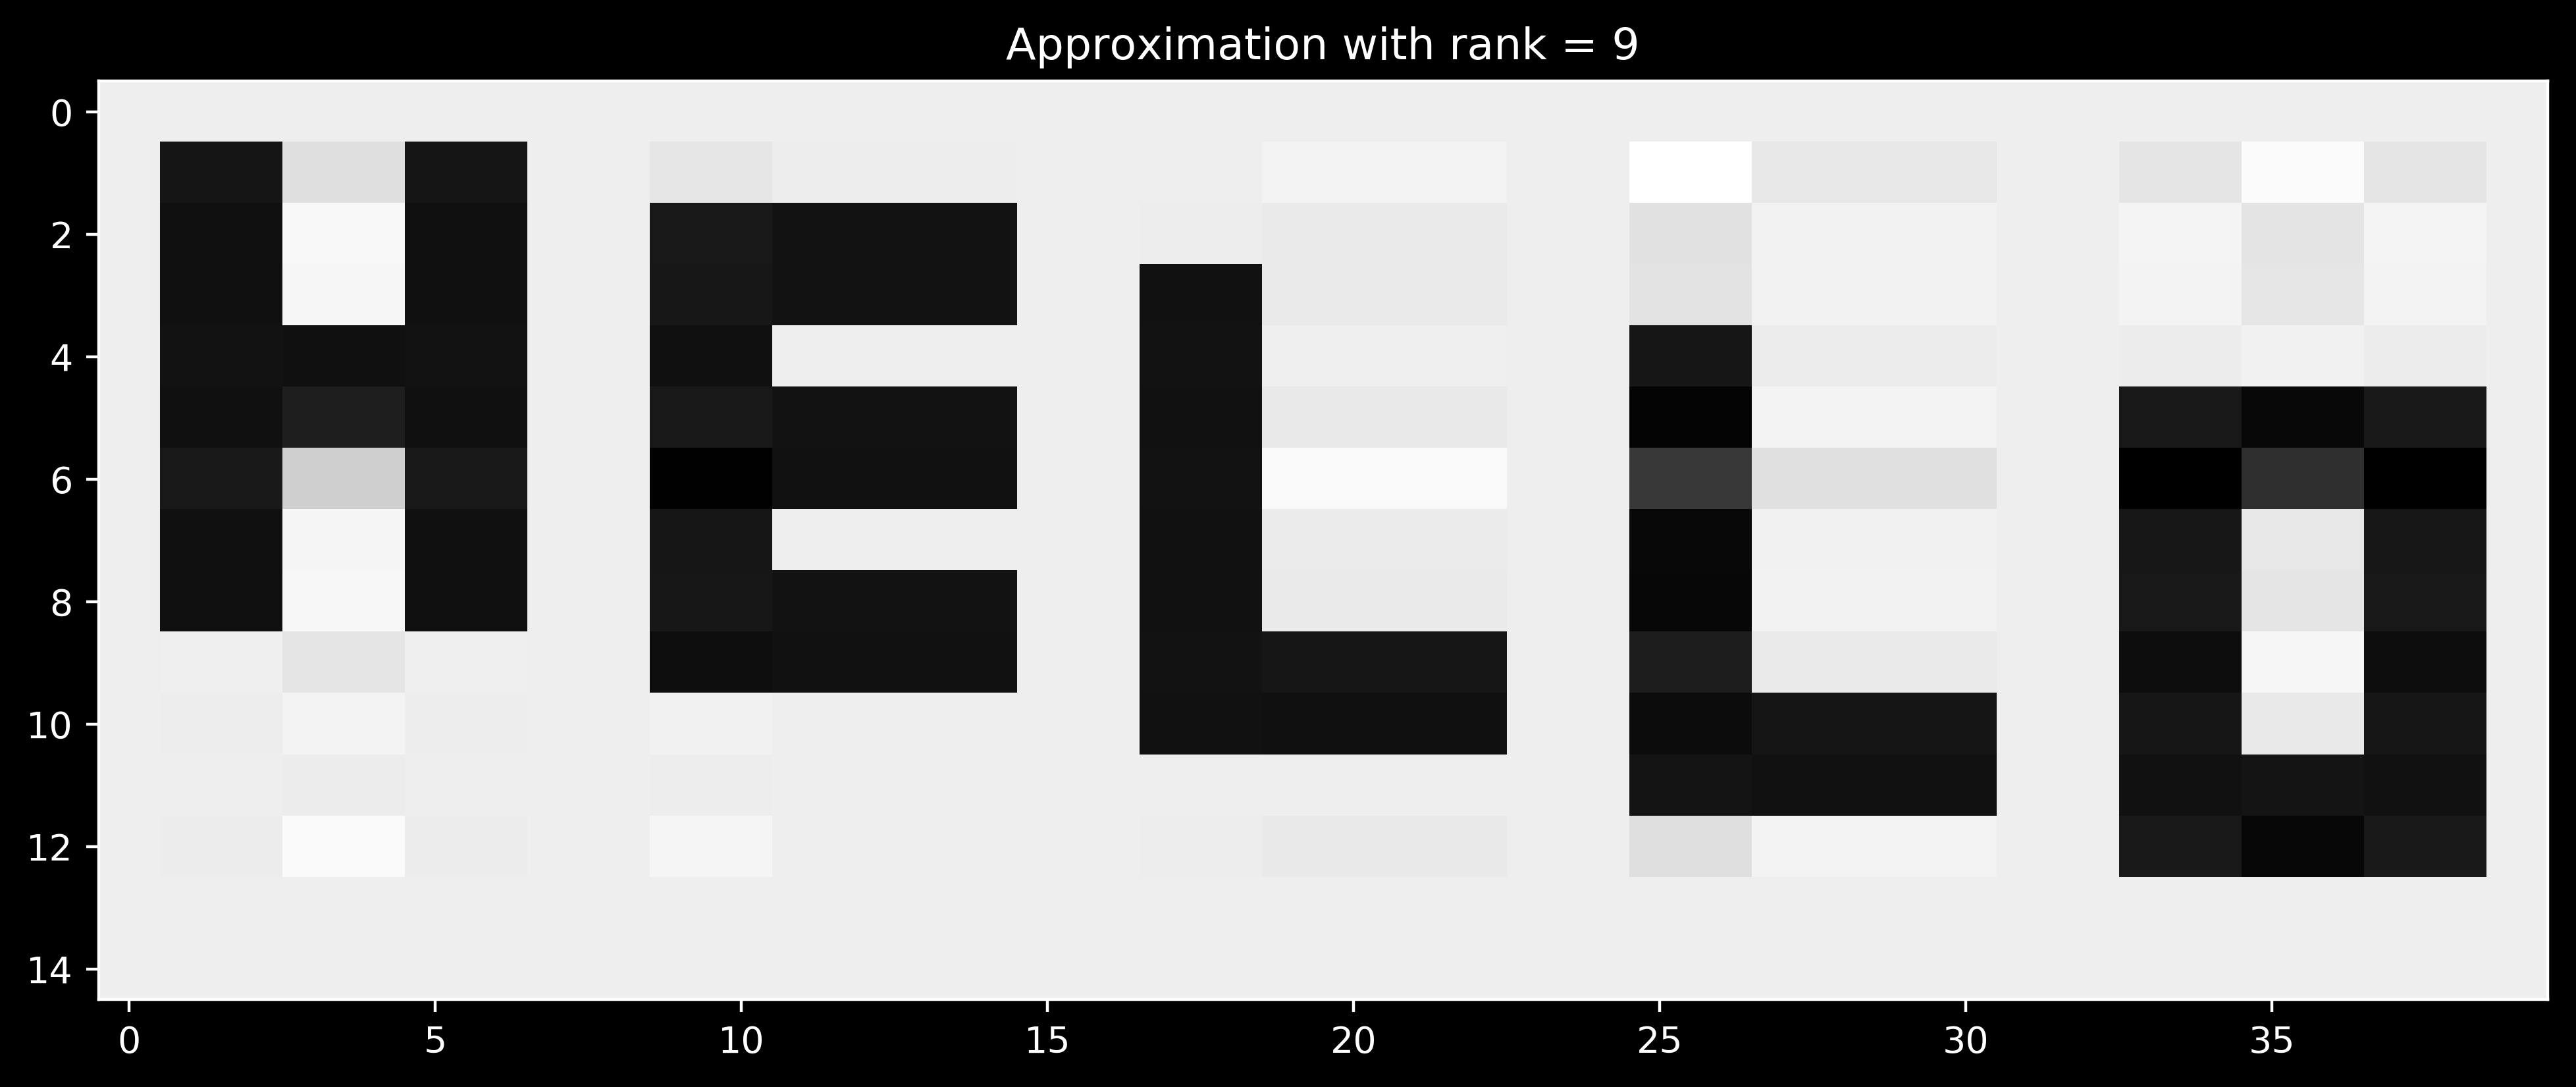

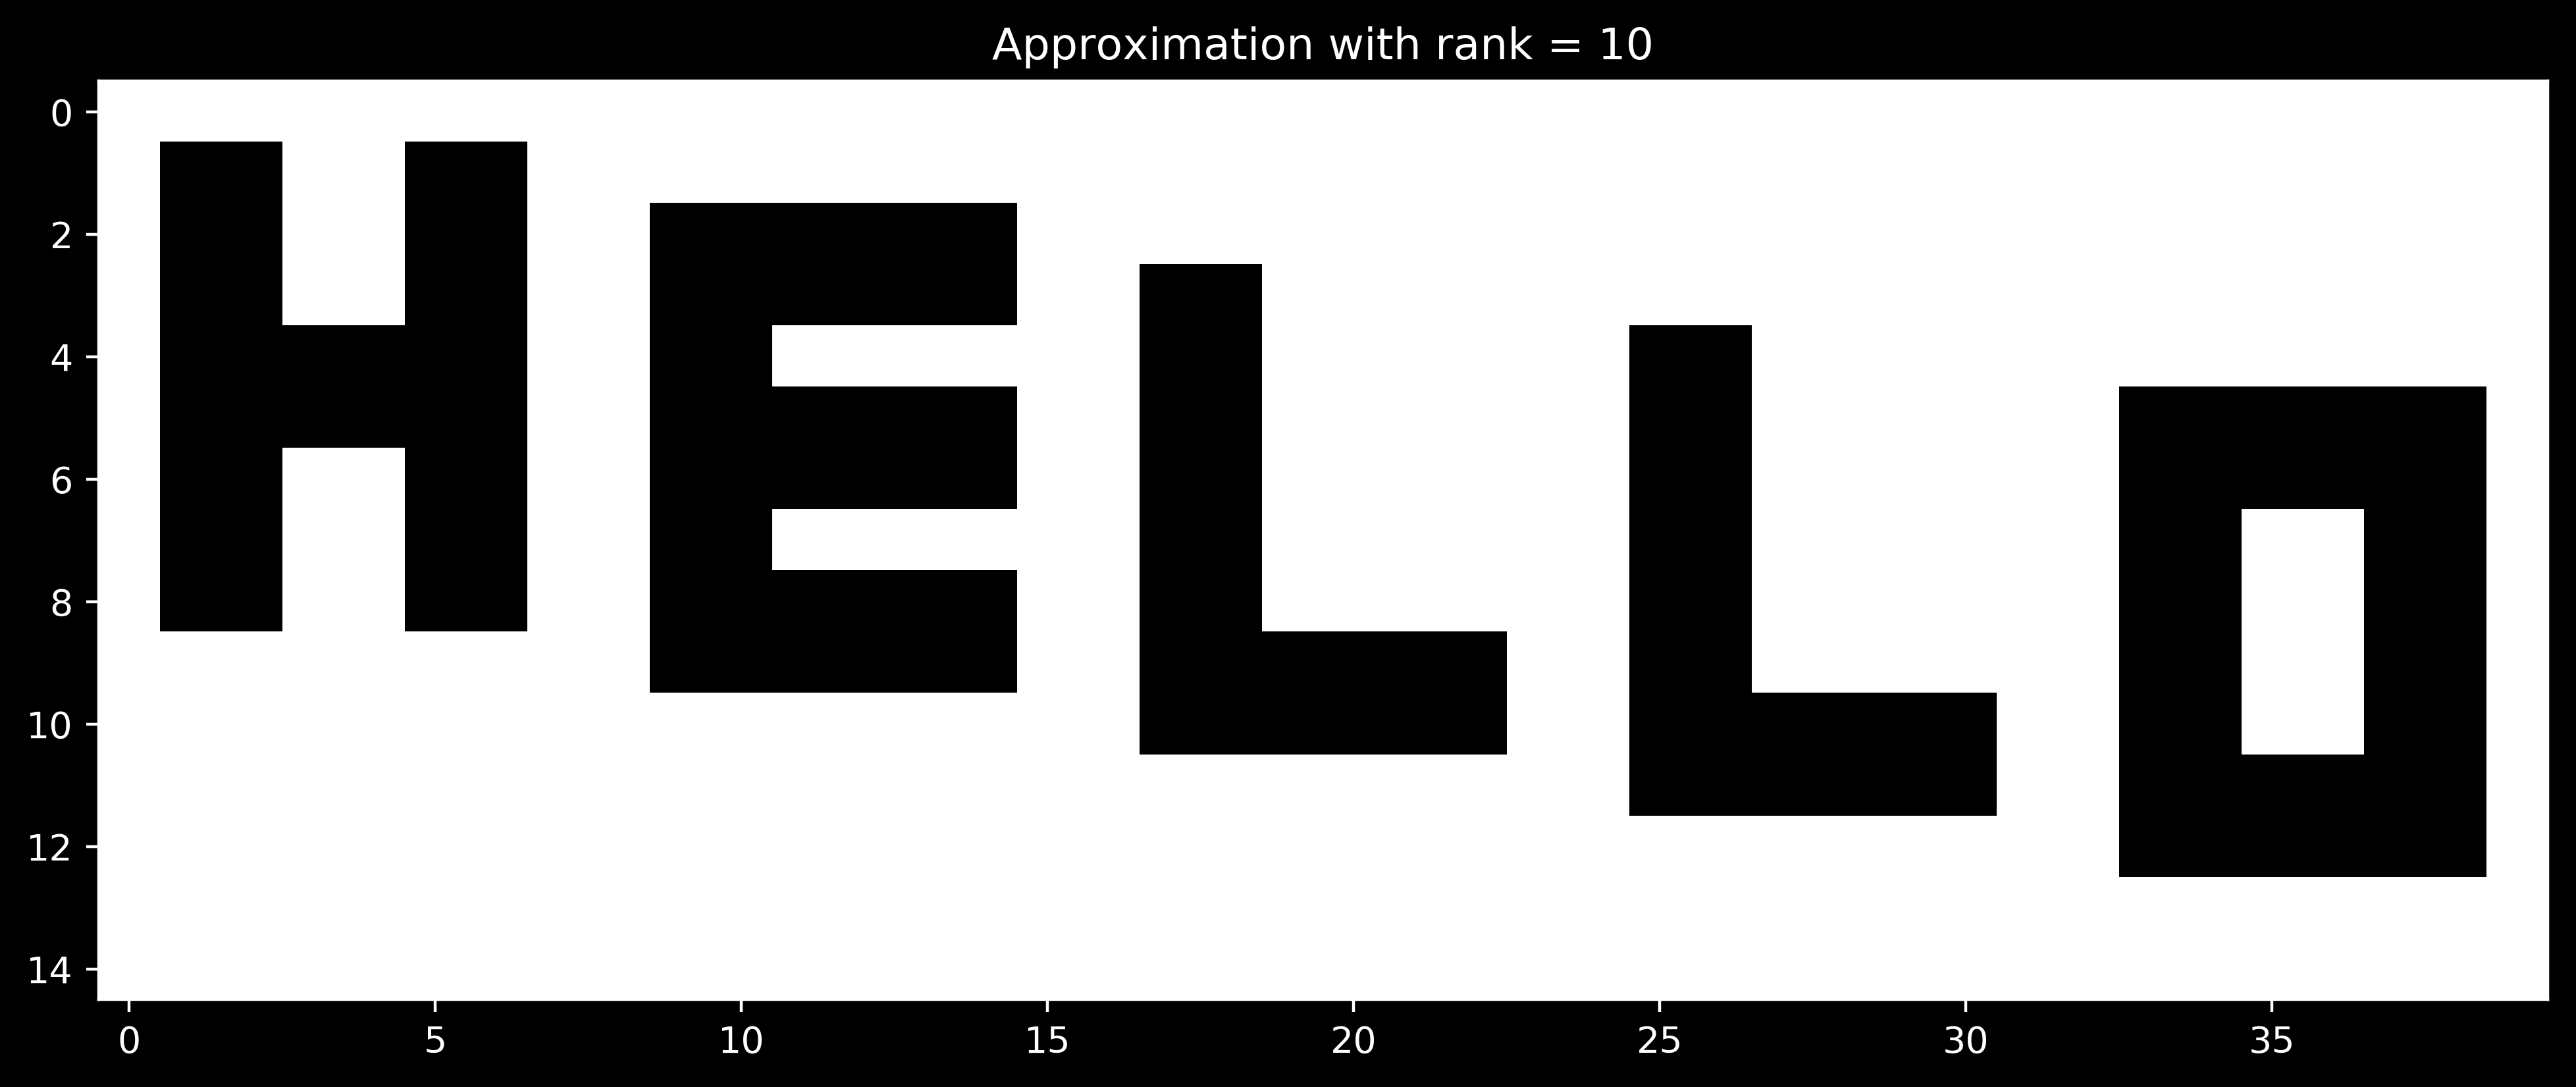

In [5]:
V = zeros((15,40))
for i in range(10):
    plt.figure(figsize=(12,5))
    V[i,i] = v[i]
    B = dot(dot(S,V),D)
    plt.imshow(B,cmap="gray_r",interpolation="none");
    #plt.pcolor(B)
    #ax = plt.gca()
    #ax.invert_yaxis()
    plt.title('Approximation with rank = ' + str(i+1));
    plt.show()

# Q10.4

# 10.4.a

In [6]:
from numpy import *

teta = pi/6
F = [[-1*cos(teta),sin(teta)], [sin(teta),cos(teta)]]
J = [[cos(teta),sin(teta)], [-1*sin(teta),cos(teta)]]

out = linalg.solve(J,F)
print (out)

[[-1.00000000e+00  0.00000000e+00]
 [ 2.98569296e-17  1.00000000e+00]]


J is rotation matrix through clockwise direction by teta
From the above equation we can see that F matrix is first y-symmetric of a vector and than makes a rotation through clockwise direction by teta.

# 10.4.b

In [7]:
from numpy import *

def givens(A):
    m = shape(A)[0]
    n = shape(A)[1]
    Q = eye((m))
    for j in range(n):
        for i in reversed(range(j,m-1)):
            c = 1.0 * A[i][j] / sqrt((A[i][j])**2 + (A[i+1][j])**2)
            s = 1.0 * A[i+1][j] / sqrt((A[i][j])**2 + (A[i+1][j])**2)
            G = identity((m))
            G[i][i] = c
            G[i][i+1] = s
            G[i+1][i] = -s
            G[i+1][i+1] = c
            A = dot(G,A)
            Q = dot(G,Q)
    Q = transpose(Q)
    return Q, A

A = 10*random.random((3,3))
print ("The random A matrix is:")
print (A)
print ()
Q, R = givens(A)
print ("The Q matrix after Givens-QR factorization is:")
print (Q)
print ()
print ("The R matrix after Givens-QR factorization is:")
print (R)
print ()
print ("The A matrix that get from QR defactorization is:")
print (dot(Q,R))


The random A matrix is:
[[3.13404493 7.8244194  5.56000111]
 [7.91806586 3.67727334 8.20248704]
 [0.38959701 5.05236925 5.93298699]]

The Q matrix after Givens-QR factorization is:
[[ 0.36764466  0.71422969  0.59557816]
 [ 0.92884266 -0.31348942 -0.19742261]
 [ 0.04570236  0.62577978 -0.77865972]]

The R matrix after Givens-QR factorization is:
[[ 8.52465779e+00  6.52311961e+00  9.93407618e+00]
 [-2.60232707e-17  7.59731688e+00  5.11246825e+00]
 [ 3.12076462e-17  6.82334799e-17 -2.92771915e+00]]

The A matrix that get from QR defactorization is:
[[3.13404493 7.8244194  5.56000111]
 [7.91806586 3.67727334 8.20248704]
 [0.38959701 5.05236925 5.93298699]]


# Q11.3

In [8]:
from numpy import *

def vector(m,n):
    t = transpose(linspace(0.0, 1.0, m))
    b = cos(4*t)
    X = fliplr(vander(t))
    A = X[0:m, 0:n]
    return A, b

def mgs(A, m, n):
    V = zeros((m, n))
    Q = zeros((m, n))
    R = zeros((n, n))
    for i in range(n):
        V[:,i] = A[:,i]
    for i in range(n):
        R[i,i] = linalg.norm(V[:,i])
        Q[:,i] = V[:,i]/R[i,i]
        for j in range(i+1,n,1):
            R[i,j] = inner(Q[:,i], V[:,j])
            V[:,j] = V[:,j] - R[i,j]*Q[:,i]
    return Q, R

def house(A, m, n):
    W = zeros((m, n))
    R = zeros((m, n))
    R[0:m, 0:n] = A[0:m, 0:n]
    for k in range(n):
        X = zeros((m-k))
        X[0:m-k] = R[k:m, k]
        s = sign(X[0])
        V = X
        V[0]=s*linalg.norm(X) + V[0]
        V = V/linalg.norm(V)
        W[k:m,k] = V
        R[k:m,k:n] = R[k:m,k:n] - 2*outer(V, dot(transpose(V), R[k:m,k:n]));
    R = R[0:n, 0:n]
    return W, R

def formQ(W, m, n):
    Q = eye((m))
    for j in range(m):
        for k in reversed(range(n)):
            Q[k:m,j] = Q[k:m,j] - 2*W[k:m,k]*(dot(transpose(W[k:m,k]), Q[k:m,j]));
    return Q

m = 50
n = 12

A, b = vector(m,n)
xa = linalg.solve(dot(transpose(A),A),dot(transpose(A),b))
print ("Result of part A: ((A'*A)\(A'*b))")
print (xa)
norma = linalg.norm(dot(A,xa)-b)
print ("Least square error is =")
print (norma)
print ()

A, b = vector(m,n)
Q, R = mgs(A,m,n)
xb = linalg.solve(R,dot(transpose(Q), b))
print ("Result of part B: (Modified Gram-Schmidt Method)")
print (xb)
normb = linalg.norm(dot(A, xb) - b)
print ("Least square error is =")
print (normb)
print ()

A, b = vector(m,n)
W, R = house(A, m, n)
Q = formQ(W, m, n)
Q = Q[:, 0:n]
xc = linalg.solve(R, dot(transpose(Q), b))
print ("Result of part C: (Householder Triangularization)")
print (xc)
normc = linalg.norm(dot(A, xc) - b)
print ("Least square error is =")
print (normc)
print ()

A, b = vector(m,n)
Q, R = linalg.qr(A)
xd = linalg.solve(R, dot(transpose(Q), b))
print ("Result of part D: (Python Predefined QR Decomposition)")
print (xd)
normd = linalg.norm(dot(A, xd) - b)
print ("Least square error is =")
print (normd)
print ()

A, b = vector(m,n)
xee = linalg.lstsq(A, b)
xe = xee[0]
print ("Result of part E: (A\ b)")
print (xe)
norme = linalg.norm(dot(A, xe)- b)
print ("Least square error is =")
print (norme)
print ()

A, b = vector(m,n)
S, v, D = linalg.svd(A)
S = S[0:m, 0:n]
V = zeros((n, n))
for i in range(n):
    V[i,i] = v[i]
xf = dot(transpose(D), linalg.solve(V, dot(transpose(S), b)))
print ("Result of part F: (Python Predefined SVD Decomposition)")
print (xf)
normf = linalg.norm(dot(A, xf) - b)
print ("Least square error is =")
print (normf)


Result of part A: ((A'*A)\(A'*b))
[ 9.99999996e-01  1.30523249e-06 -8.00004848e+00  6.97112148e-04
  1.06615014e+01  2.25265621e-02 -5.75146658e+00  1.17948482e-01
  1.46312601e+00  1.77058390e-01 -4.46070981e-01  1.01083120e-01]
Least square error is =
3.177019880944434e-08

Result of part B: (Modified Gram-Schmidt Method)
[ 1.00000000e+00 -2.67599320e-07 -7.99998732e+00 -2.26274662e-04
  1.06687050e+01 -1.04782875e-02 -5.65671261e+00 -5.74115969e-02
  1.67218798e+00  2.19701526e-02 -3.80952230e-01  8.92617936e-02]
Least square error is =
8.501305218875228e-09

Result of part C: (Householder Triangularization)
[ 1.00000000e+00 -4.22743454e-07 -7.99998124e+00 -3.18763435e-04
  1.06694308e+01 -1.38202940e-02 -5.64707561e+00 -7.53160518e-02
  1.69360699e+00  6.03208687e-03 -3.74241695e-01  8.80405745e-02]
Least square error is =
7.999152888816857e-09

Result of part D: (Python Predefined QR Decomposition)
[ 1.00000000e+00 -4.22742758e-07 -7.99998124e+00 -3.18763193e-04
  1.06694308e+01 -

/Users/onurpoyraz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:92: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


The last 4 operations gives the best results. Modified-Gram Schmidt results not as good as last 4 ones but better than classical (A'*A)\(A'*b) calculation.